# CIFAR100 Image Classification - Coarse

Name: Soh Hong Yu<br/><br/>
Admin Number: P2100775<br/><br/>
Class: DAAA/FT/2B/01<br/><br/>
Module Code: ST1504 Deep Learning<br/>

<hr>
<h3>References (In Harvard format):</h3>
<ol>
  <li>Krizhevsky, A., Nair, V. and Hinton, G. (2009) The CIFAR-10 dataset and CIFAR-100 dataset, CIFAR-10 and CIFAR-100 datasets. <br/>Available at: <a href="https://www.cs.toronto.edu/~kriz/cifar.html">https://www.cs.toronto.edu/~kriz/cifar.html</a> (Accessed: November 24, 2022). </li>
  <li>User, D. (2022) An overview of state of the art (SOTA) deep neural networks (dnns), Deci. <br/>Available at: <a href="https://deci.ai/blog/sota-dnns-overview/">https://deci.ai/blog/sota-dnns-overview/</a> (Accessed: November 19, 2022). </li>
  <li>Cox, S. (2021) The overlooked technique of image averaging, Photography Life. <br/>Available at: <a href="https://photographylife.com/image-averaging-technique">https://photographylife.com/image-averaging-technique</a> (Accessed: November 19, 2022). </li>
  <li>Gupta, A. et al. (2021) Adam vs. SGD: Closing the generalization gap on Image Classiﬁcation, Adam vs. SGD: Closing the generalization gap on image classification. <br/>Available at: <a href="https://www.opt-ml.org/papers/2021/paper53.pdf">https://www.opt-ml.org/papers/2021/paper53.pdf</a> (Accessed: November 19, 2022). </li>
  <li>Nelson, J. (2020) Why and how to implement random crop data augmentation, Roboflow Blog. Roboflow Blog. <br/>Available at: <a href="https://blog.roboflow.com/why-and-how-to-implement-random-crop-data-augmentation">https://blog.roboflow.com/why-and-how-to-implement-random-crop-data-augmentation</a> (Accessed: November 19, 2022). </li>
  <li>Zvornicanin, E. (2022) Convolutional Neural Network vs. Regular Neural Network, Baeldung on Computer Science. <br/>Available at: <a href="https://www.baeldung.com/cs/convolutional-vs-regular-nn">https://www.baeldung.com/cs/convolutional-vs-regular-nn</a> (Accessed: November 19, 2022). </li>
  <li>Baker, J. (2021) 8.2. networks using blocks (VGG)¶ <br/>Available at: <a href="https://d2l.ai/chapter_convolutional-modern/vgg.html">https://d2l.ai/chapter_convolutional-modern/vgg.html</a> (Accessed: November 19, 2022). </li>
  <li>Shinde, Y. (2021) How to code your resnet from scratch in tensorflow? , Analytics Vidhya. <br/>Available at: <a href="https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow">https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow</a> (Accessed: November 19, 2022). </li>
  <li>Baker, J. (2021) 8.6. residual networks (ResNet) <br/>Available at: <a href="https://d2l.ai/chapter_convolutional-modern/resnet.html">https://d2l.ai/chapter_convolutional-modern/resnet.html</a> (Accessed: November 19, 2022). </li>
  <li>Tan, M. and Le, Q.V. (2021) EFFICIENTNETV2: Smaller models and faster training, arXiv.org. <br/>Available at: <a href="https://arxiv.org/abs/2104.00298v3">https://arxiv.org/abs/2104.00298v3</a> (Accessed: November 25, 2022). </li>
  <li>Tan, et (2019) Papers with code - efficientnet explained, Explained | Papers With Code. <br/>Available at: <a href="https://paperswithcode.com/method/efficientnet">https://paperswithcode.com/method/efficientnet</a> (Accessed: November 25, 2022). </li>
</ol>


# Project Objective

Implement an image classifier using a deep learning network


# Background Information

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
Here is the list of classes in the CIFAR-100:


# Initialising Libraries and Variables


In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import keras_tuner as kt
from keras.regularizers import l1, l2
from keras.layers import AveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Add
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Normalization, Dense, Conv2D, Dropout, BatchNormalization, ReLU
from keras.models import Sequential
from keras.models import Model
from keras import Input
from keras.optimizers import *
from keras.callbacks import EarlyStopping
import visualkeras
from keras.layers import GlobalAveragePooling2D

# Checking GPU


In [16]:
# Check if Cuda GPU is available
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Loading Datasets


In [3]:
df = tf.keras.datasets.cifar100.load_data(label_mode="coarse")


In [4]:
(x_train_val, y_train_val), (x_test, y_test) = df


As the training set will be used to train the model, we will need a set of data for model tuning, and the testing set will be used to evaluate the final model, ensuring the model is generalise and not overfit to the validation set due to model tuning.

To decide what size of the validation set, I have decided to split the data by 80:20 of the train set as the validation set.

Training set - 40000<br/>
Validation set - 10000<br/>
Testing set - 10000<br/>


In [5]:
train_size = 40000
x_train, y_train = x_train_val[:train_size], y_train_val[:train_size]
x_val, y_val = x_train_val[train_size:], y_train_val[train_size:]

# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset.


x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-99) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-99) with shape (10000, 1) for the test data.


There are 20 different type of labels in the dataset. From the dataset, each value represent an item. The following list is the description of each value.

Labels

- 0 : aquatic mammals
- 1 : fish
- 2 : flowers
- 3 : food containers
- 4 : fruit and vegetables
- 5 : household electrical devices
- 6 : household furniture
- 7 : insects
- 8 : large carnivores
- 9 : large man-made outdoor things
- 10 : large natural outdoor scenes
- 11 : large omnivores and herbivores
- 12 : medium-sized mammals
- 13 : non-insect invertebrates
- 14 : people
- 15 : reptiles
- 16 : small mammals
- 17 : trees
- 18 : vehicles 1
- 19 : vehicles 2

In [6]:
# coarse labels
class_labels = {
    0 : "aquatic mammals",
    1 : "fish",
    2 : "flowers",
    3 : "food containers",
    4 : "fruit and vegetables",
    5 : "household electrical devices",
    6 : "household furniture",
    7 : "insects",
    8 : "large carnivores",
    9 : "large man-made outdoor things",
    10 : "large natural outdoor scenes",
    11 : "large omnivores and herbivores",
    12 : "medium-sized mammals",
    13 : "non-insect invertebrates",
    14 : "people",
    15 : "reptiles",
    16 : "small mammals",
    17 : "trees",
    18 : "vehicles 1",
    19 : "vehicles 2",
}

NUM_CLASS = 20

Each image is a 32x32 image as well as 3 color channel [RGB] (coloured image). Therefore, we can set the IMG_SIZE as a tuple (32, 32, 3)


In [7]:
IMG_SIZE = (32, 32, 3)


### Visualising the Dataset

Let's look at what the images look like.


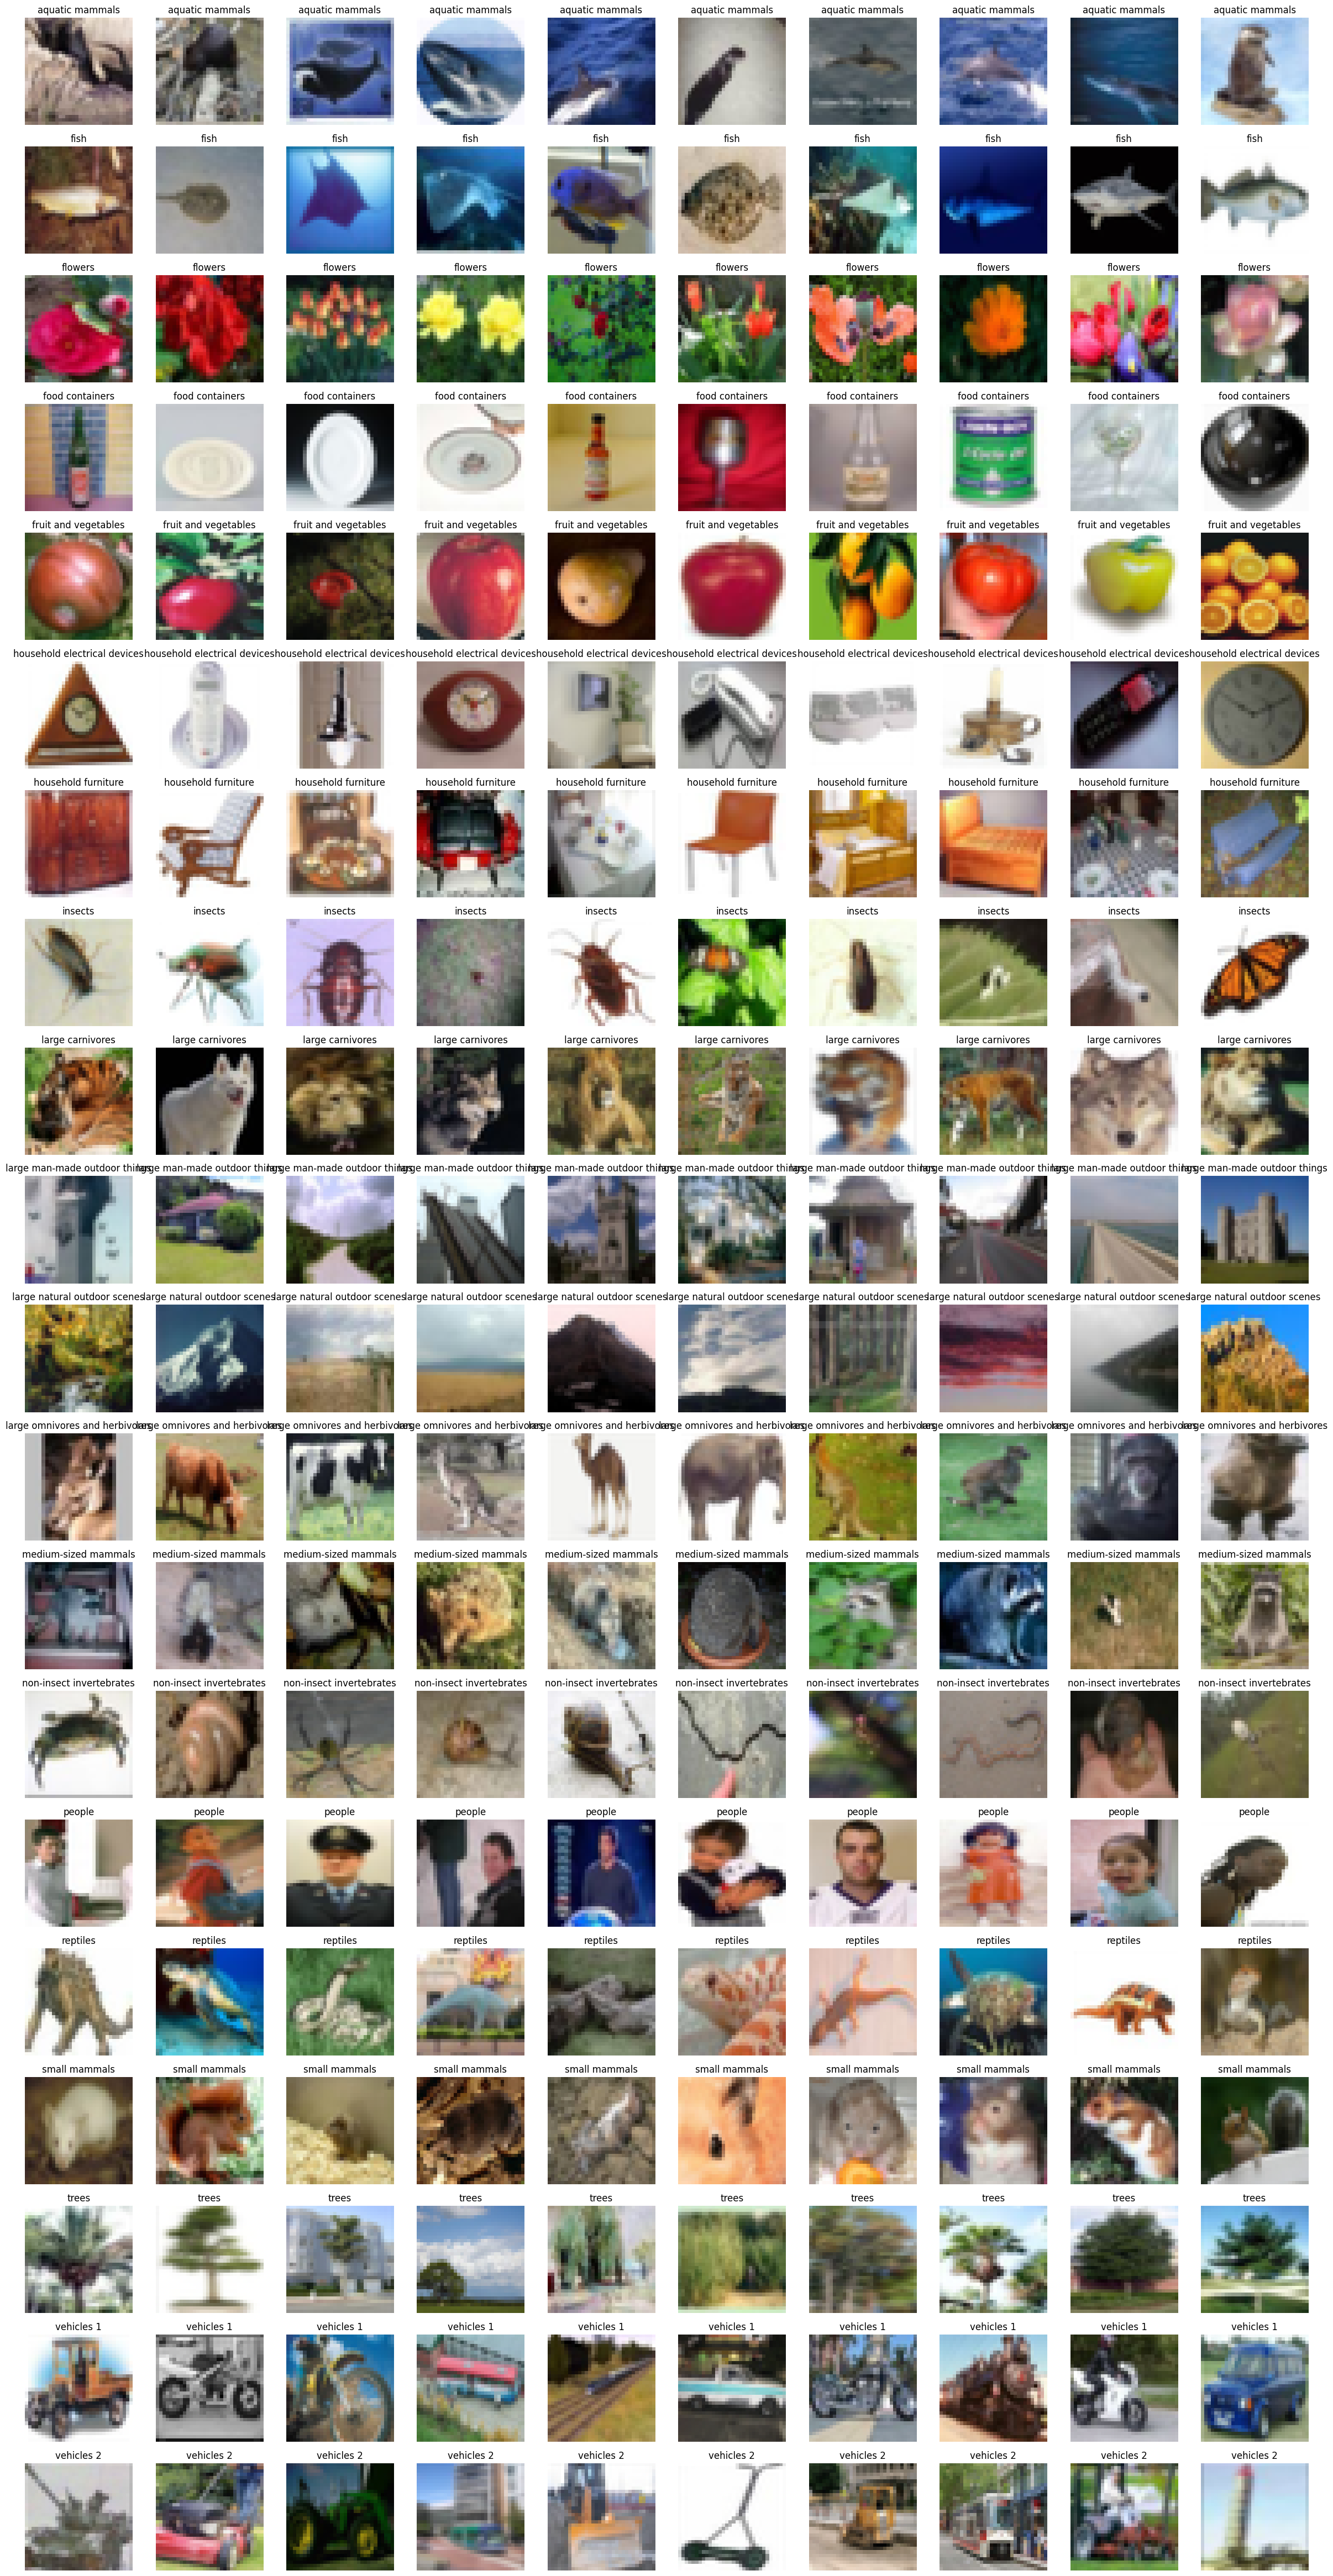

In [8]:
fig, ax = plt.subplots(20, 10, figsize=(30, 60))
for i in range(20):
    images = x_train[np.squeeze(y_train == i)]
    random_index = np.random.choice(images.shape[0], 10, replace=False)
    images = images[random_index]
    label = class_labels[i]
    for j in range(10):
        subplot = ax[i, j]
        subplot.axis("off")
        subplot.imshow(images[j])
        subplot.set_title(label)

plt.show()


<u><b>Observation</b></u>

We note that there are certain images with other objects that is in the system as well. There is a wide variety of images and that the images are of different type of items too. For example, vehicle 2 has a lawn mower and rockets. This makes it hard for the model to generalise which might cause some issue later on.

### Class Distribution

When training a machine learning model, it is always important to check the distribution of the different classes in the dataset. This will inform us which metrics is the best to use and if anything is needed to balance the classes.


In [9]:
labels, counts = np.unique(y_train, return_counts=True)
for label, count in zip(labels, counts):
    print(f"{class_labels[label]}: {count}")


aquatic mammals: 1980
fish: 1999
flowers: 2028
food containers: 1982
fruit and vegetables: 1978
household electrical devices: 2006
household furniture: 1950
insects: 2018
large carnivores: 2000
large man-made outdoor things: 1997
large natural outdoor scenes: 2044
large omnivores and herbivores: 2039
medium-sized mammals: 2020
non-insect invertebrates: 1985
people: 1993
reptiles: 1997
small mammals: 1979
trees: 1969
vehicles 1: 2020
vehicles 2: 2016


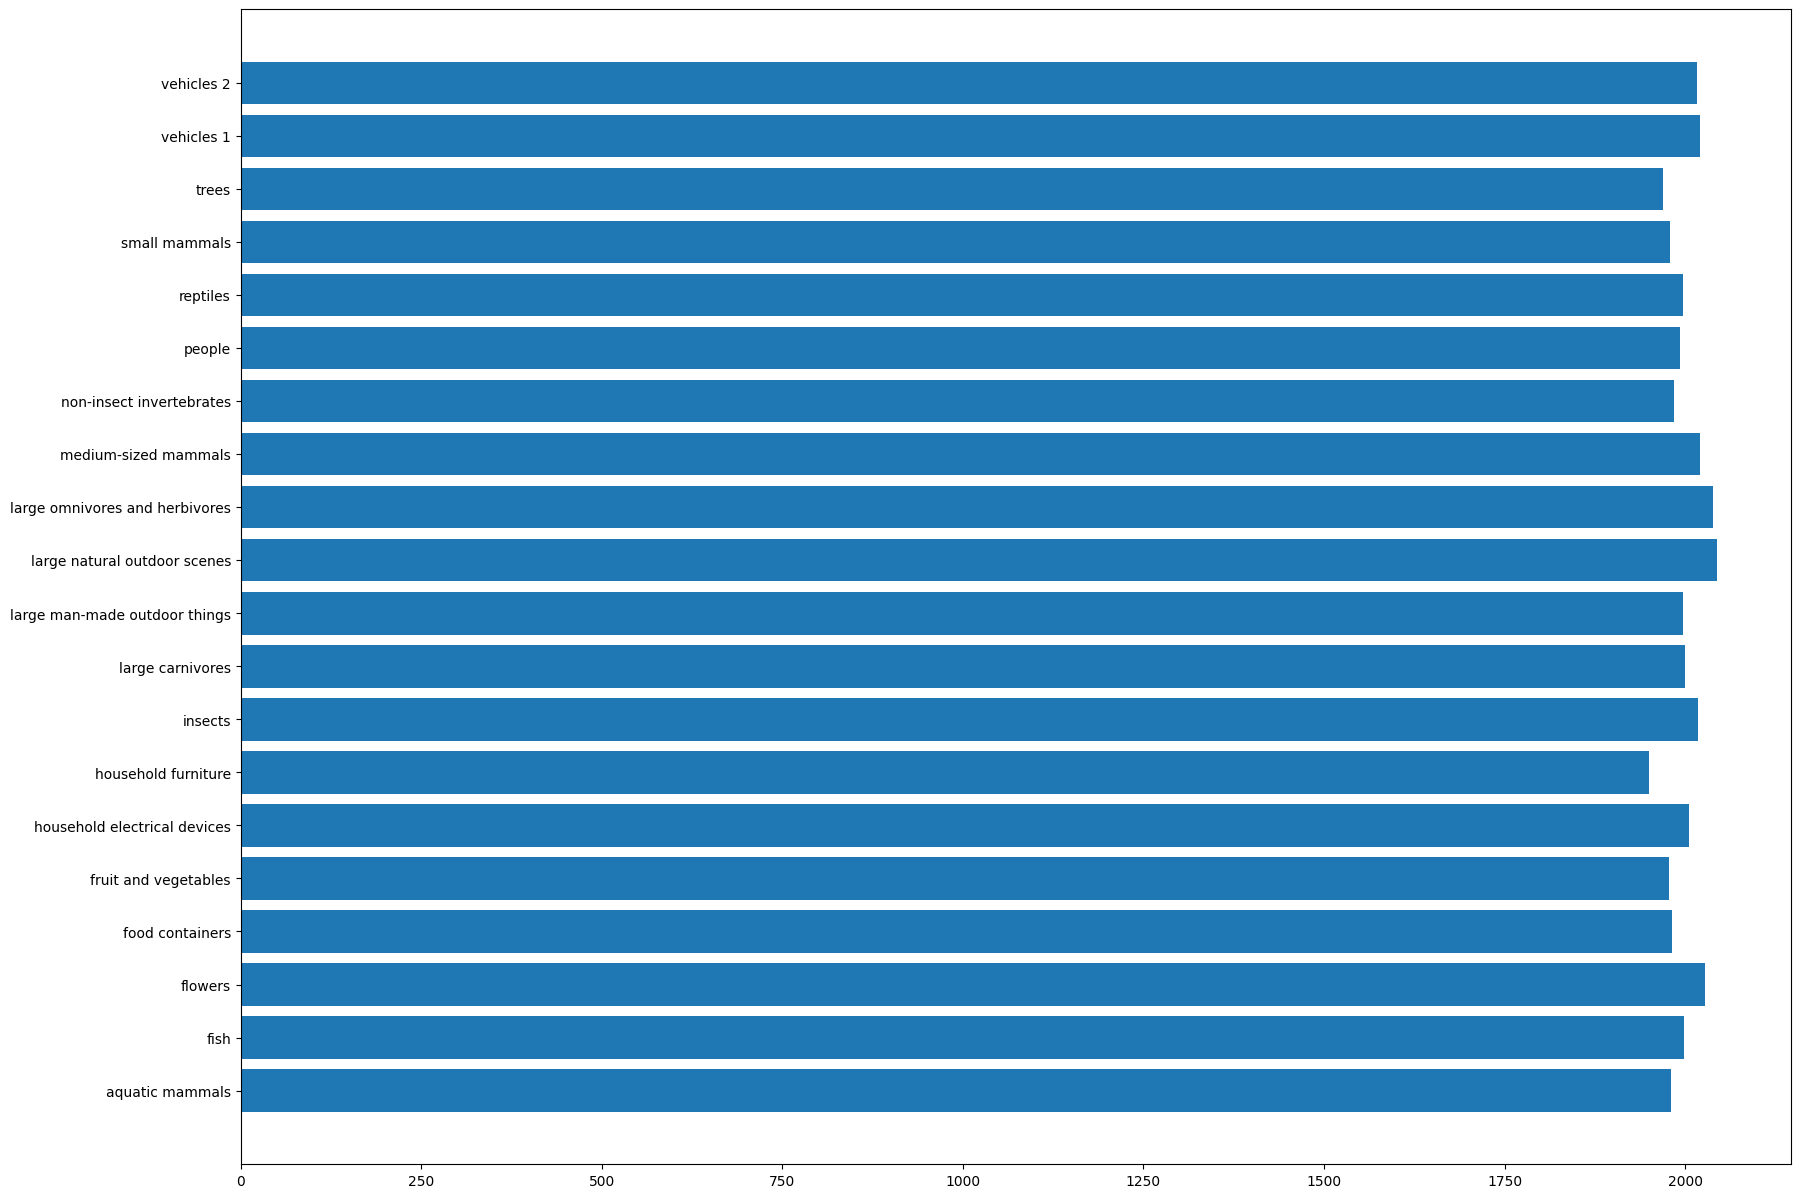

In [10]:
plt.figure(figsize=(20, 15))
plt.barh(labels, counts, tick_label=list(class_labels.values()))
plt.show()


<u><b>Observations</b></u>

As we can see from the bar graph, the distribution of the images is even. This suggest that accuracy can be use as a primary metric.


### Image Pixel Distribution

We need to know the pixel intensity and know the distribution of the pixels


In [11]:
print("Max: ", np.max(x_train))
print("Min: ", np.min(x_train))


Max:  255
Min:  0


As expected, our pixels have values between 0 and 255.


In [12]:
mean, std = np.mean(x_train, axis=(0, 1, 2)), np.std(x_train, axis=(0, 1, 2))
print("Mean:", mean)
print("std:", std)


Mean: [129.26910793 124.11666553 112.55583118]
std: [68.11519598 65.3142698  70.31977601]


### Image Averaging

Image Averaging involves stacking multiple photos on top of each other and averaging them together. The main purpose is to see the noise of the image adn therefore reducing it.


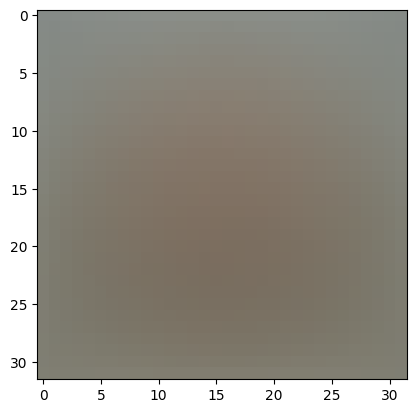

In [13]:
plt.imshow(np.mean(x_train, axis=0) / 255, cmap='Greys')
plt.show()


<u><b>Observation</b></u>

We cannot see a single thing from the image. This is likely due to the color of the images overlaying each other giving this blur effect.

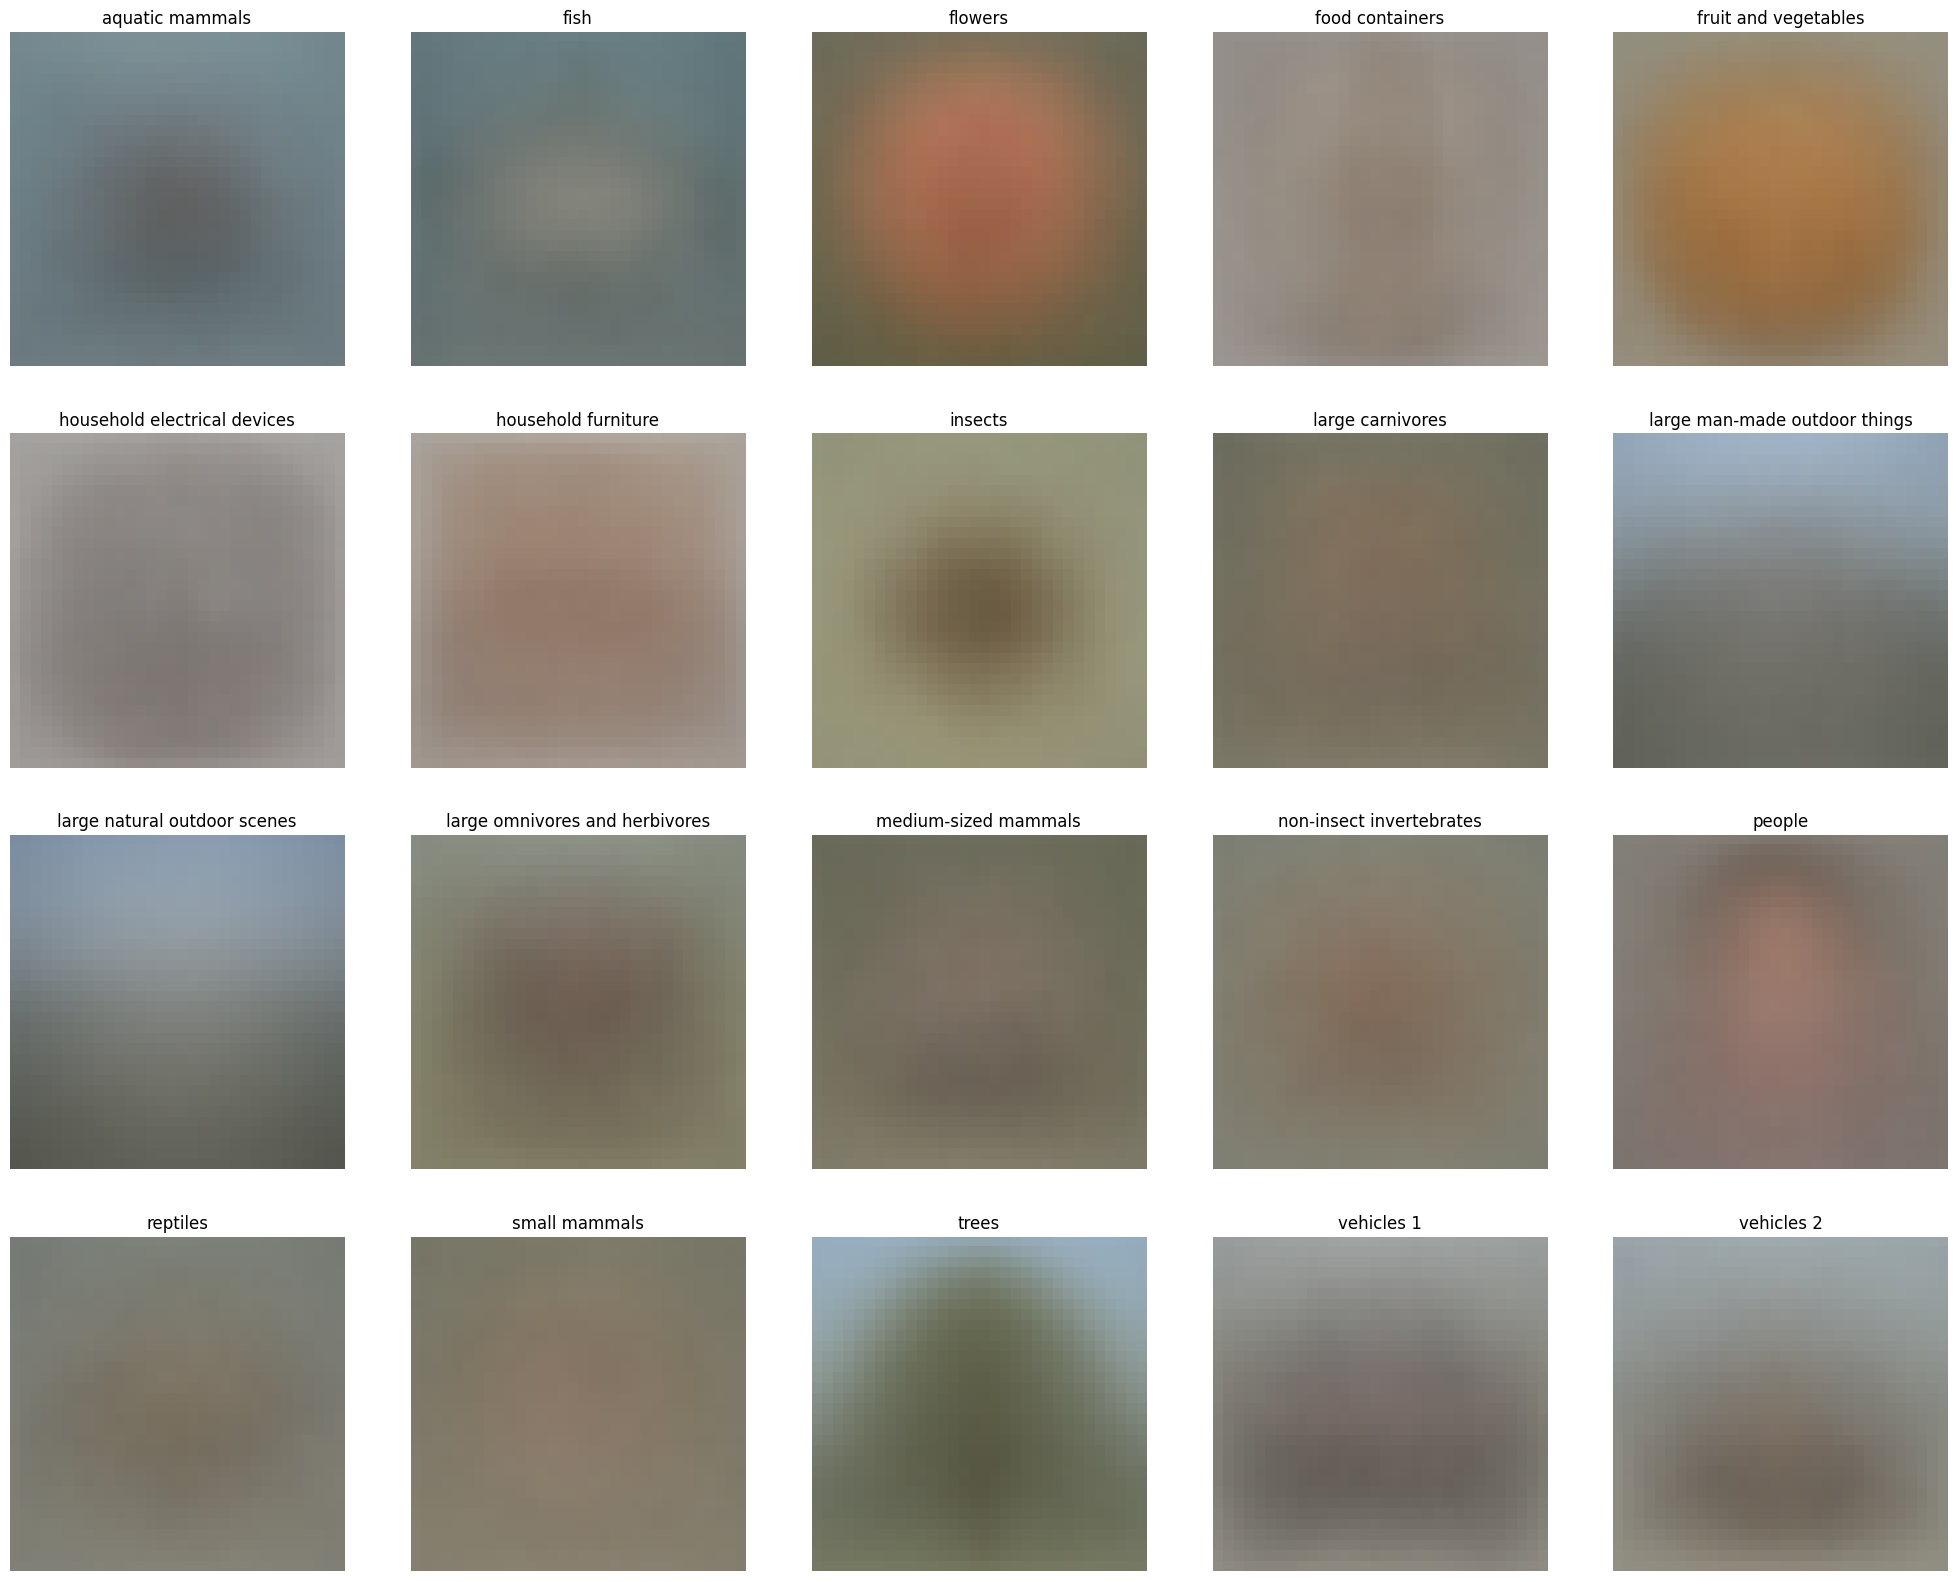

In [14]:
fig, ax = plt.subplots(4, 5, figsize=(25, 20))

for idx, subplot in enumerate(ax.ravel()):
    avg_image = np.mean(x_train[np.squeeze(y_train == idx)], axis=0) / 255
    subplot.imshow(avg_image, cmap='Greys')
    subplot.set_title(f"{class_labels[idx]}")
    subplot.axis("off")


<u><b>Observations</b></u>

Although the average images is blurry, we can make out the images of a trees, flowers, fruits and vegetables etc. It is more difficult to make out the average image for the other classes, which might suggest that it is harder to predict these classes. We also note some of the average images like the flowers and fruits and vegetables have a similar shade and average image which might be a problem for the model.

# Data Preprocessing

Before modelling, its is important to perform data preprocessing


### One Hot Encoding

As they are, the current labels are encoded from 0-99, we will one hot encode the labels.


In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [16]:
print(y_train[0])
print("Label:", tf.argmax(y_train[0]))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Label: tf.Tensor(11, shape=(), dtype=int64)


### Normalizing the inputs

Image normalisation is done to the dataset.

Normalising the inputs means that we will calculate the mean and standard deviation of the training set, and then apply the formula below.

$$X_{} = \frac{X_{} - μ_{}}{σ_{}}$$

Pixel values of each pixel are on similar scale, therefore normalisation can be used. This helps to optimize the algorithm to better converge during gradient descent.


In [10]:
pre_processing_v1 = Normalization()
pre_processing_v1.adapt(x_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


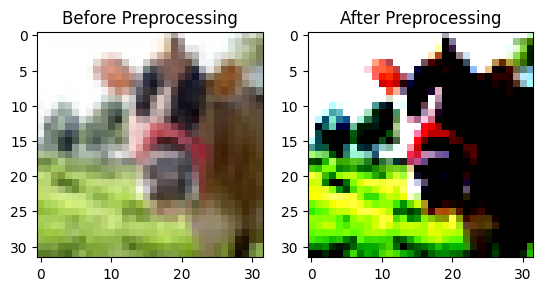

In [18]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(x_train[0])
ax[0].set_title('Before Preprocessing')
ax[1].imshow(tf.squeeze(pre_processing_v1(x_train[:1, :, :])))
ax[1].set_title('After Preprocessing')
plt.show()


### Data Augmentation

To prevent overfitting of the model, we will apply data augmentation. Data augmentation is a method to reduce the variance of a model by imposing random transformations on the data for training.

Types of Image Data Augmentations

- Flipping
- Cropping
- Rotating
- Scaling
- Shearing
- Many more ...

For this case, we will be using only flipping, resizing and cropping. This is because as we seen during our exploratory data analysis. The images are all in the same orientation which means we can flip left and right to help make data augmentation better. To have more data points, we will resize and add more padding to the images, this will allow us to crop without cropping the object out of the image. Cropping the images also allows the model to generalise the data and identify features more easily.

Note: we will only be augmenting the training data as we do not want to edit the validation and test data as they will be used to evaluate the model's accuracy.


##### Batch Size
To help make the model to have a regularizing effect, we will choose the smaller batch sizes. We will choose a batch size of 64 as it allows the model to converge more easily.


In [11]:
BATCH_SIZE = 64


##### Basic Augmentation

In [17]:
def data_augmentation(x_train):
    imageArr = []
    for images in x_train:
        tf.convert_to_tensor(images)
        randomVal = np.random.randint(0,2)
        if randomVal == 1:
            image = tf.image.random_flip_left_right(images)
            image = tf.image.resize_with_crop_or_pad(
                image, IMG_SIZE[0] + 4, IMG_SIZE[1] + 4)
            image = tf.image.random_crop(
                image, size=IMG_SIZE
            )
            images = image
        imageArr.append(images)
    return np.array(imageArr)


In [18]:
x_train_aug = np.copy(x_train)


In [19]:
x_train_aug = data_augmentation(x_train_aug)


Let's see what happened to the data after we have augmented it.


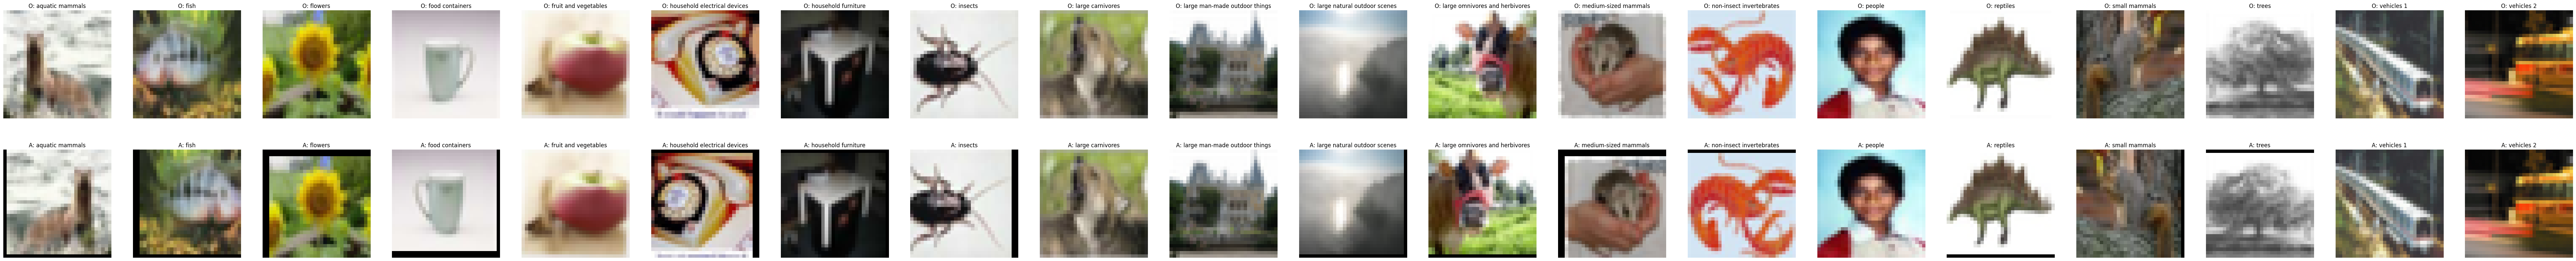

In [20]:
fig, ax = plt.subplots(2, 20, figsize=(100, 10))
for idx in range(40):
    subplot = ax.ravel()[idx]
    y_label = np.argmax(y_train, axis=1)
    if idx >= 20:
        subplot.set_title(f"A: {class_labels[idx % 20]}")
        subplot.imshow(x_train_aug[y_label == idx % 20][0])
    else:
        subplot.set_title(f"O: {class_labels[idx % 20]}")
        subplot.imshow(x_train[y_label == idx % 20][0])
    subplot.axis("off")
plt.show()


<u><b>Observations</b></u>

As we can see, some of the images have been shifted, rotated and cropped. This shows that the image augmentation works


# Building Models

We will be building a few deep learning models to solve the image classification problem.

**Model List:**

1. Fully Connected Neural Network Model (Baseline)
2. Conv2D Neural Network Model
3. CustomVGG Model
4. CustomVGG16 Model
5. CustomResNet-10 Model
6. EfficientNetV2 Model

<img src="https://deci.ai/wp-content/uploads/2022/03/dnns-1-1024x569.jpg.webp"/>


### Overfitting

To prevent overfitting, we will be using Early Stopping. This will stop model training once it begins to overfit.


### Optimizers

There are a lot of different types of optimizers offered by Tensorflow. The most common 2 are Adam and SGD optimizers.

**Adam**<br>
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**SGD**<br>
SGD also known as Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness.

**Difference between Adam and SGD**<br>
Adam is faster compared to SGD, this is due to Adam using coordinate wise gradient clipping which tackle heavy-tailed noise. It also updates the learning rate for each network weight individually. However, SGD is known to perform better than SGD for image classification tasks. As Adam takes "shortcuts" as mentioned previously which is better for NLP and other purposes but for Image Classification, every detail is important to distinguish what the image is. Therefore for all the subsequent models, we will be using the SGD as our optimizer.


### Utility Function

Before we begin building our models, we will first be building some functions that will help us to compare our models more easily.


In [21]:
def plot_loss_curve(modelInfo):
    history = modelInfo.history
    history = pd.DataFrame(history)
    epochs = list(range(1, len(history) + 1))
    if np.max(history["val_loss"]) > 1 or np.max(history["loss"]) > 1:
        fig, ax = plt.subplots(1, 2, figsize=(20, 10))
        ax[0].set_title("Plot Loss Curve")
        ax[1].set_title("Plot Accuracy Curve")
        ax[0].scatter(epochs, history["loss"])
        ax[0].plot(epochs, history["loss"], label="Training Loss")
        ax[0].scatter(epochs, history["val_loss"])
        ax[0].plot(epochs, history["val_loss"], label="Validation Loss")
        ax[1].scatter(epochs, history["accuracy"])
        ax[1].plot(epochs, history["accuracy"], label="Training Accuracy")
        ax[1].scatter(epochs, history["val_accuracy"])
        ax[1].plot(epochs, history["val_accuracy"], label="Validation Accuracy")
        ax[0].set_ylabel("Accuracy")
        ax[0].set_xlabel("Epochs")
        ax[1].set_ylabel("Accuracy")
        ax[1].set_xlabel("Epochs")
        plt.legend()
    else: 
        fig, ax = plt.subplots(1, 1, figsize=(20, 10))
        plt.title("Plot Loss Curve")
        plt.scatter(epochs, history["loss"])
        plt.plot(epochs, history["loss"], label="Training Loss")
        plt.scatter(epochs, history["val_loss"])
        plt.plot(epochs, history["val_loss"], label="Validation Loss")
        plt.scatter(epochs, history["accuracy"])
        plt.plot(epochs, history["accuracy"], label="Training Accuracy")
        plt.scatter(epochs, history["val_accuracy"])
        plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("Epochs")
        plt.legend()
    return fig


In [22]:
allResults = pd.DataFrame()


In [23]:
def storeResult(modelInfo):
    history = modelInfo.history
    global allResults
    best_val_idx = np.argmax(history["val_accuracy"])
    result = {}
    result["Model Name"] = modelInfo.model._name
    result["Epochs"] = len(history["loss"])
    result["Batch Size"] = BATCH_SIZE
    result["Train Loss"] = history["loss"][best_val_idx]
    result["Val Loss"] = history["val_loss"][best_val_idx]
    result["Train Acc"] = history["accuracy"][best_val_idx]
    result["Val Acc"] = history["val_accuracy"][best_val_idx]
    result["[Train - Val] Acc"] = result["Train Acc"] - result["Val Acc"]
    allResults = allResults.append(result, ignore_index=True)
    return result

### Baseline Fully Connected Neural Network

As our baseline model, we will be using it to compare against our other models that we are trying to build. This model will be very simple Model using the Sequential class and 3 Hidden Layers. For each hidden layer, we will be using the ReLU activation function and for the final output layer we will be using softmax as there is multiple classes therefore sigmoid will not be usable. As there are multiple category that we are predicting, we will be using the categorical_crossentropy as our loss function. The optimizer will be SGD as mentioned previously and we will be using the metrics of accuracy as the classes are quite balanced.


##### Training baseline model without Data Augmentation

To train the baseline model, we will first use our unaugmented data to fit and train the model. Subsequently, we will use our augmented data to fit and train and compare the difference.


In [33]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Flatten()(x)
x = Dense(128, 'relu')(x)  # Hidden Layer 1
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(NUM_CLASS, 'softmax')(x)
baseModel = Model(inputs=inputs, outputs=x, name="baseline")
baseModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
baseModelHistory = baseModel.fit(x_train, y_train, epochs=100,
                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 5s 7ms/step - loss: 2.4924 - accuracy: 0.2348 - val_loss: 2.3523 - val_accuracy: 0.2776
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 2.2656 - accuracy: 0.3022 - val_loss: 2.2726 - val_accuracy: 0.2993
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 2.1574 - accuracy: 0.3325 - val_loss: 2.2337 - val_accuracy: 0.3156
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0774 - accuracy: 0.3575 - val_loss: 2.2212 - val_accuracy: 0.3257
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0171 - accuracy: 0.3727 - val_loss: 2.2129 - val_accuracy: 0.3303
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.9677 - accuracy: 0.3868 - val_loss: 2.2133 - val_accuracy: 0.3345
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.9129 - accuracy: 0.4015 - val_loss: 2.2265 - val_accuracy: 0.3300

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'baseline', 'Epochs': 18, 'Batch Size': 64, 'Train Loss': 1.8641740083694458, 'Val Loss': 2.212881326675415, 'Train Acc': 0.41530001163482666, 'Val Acc': 0.3384999930858612, '[Train - Val] Acc': 0.07680001854896545}


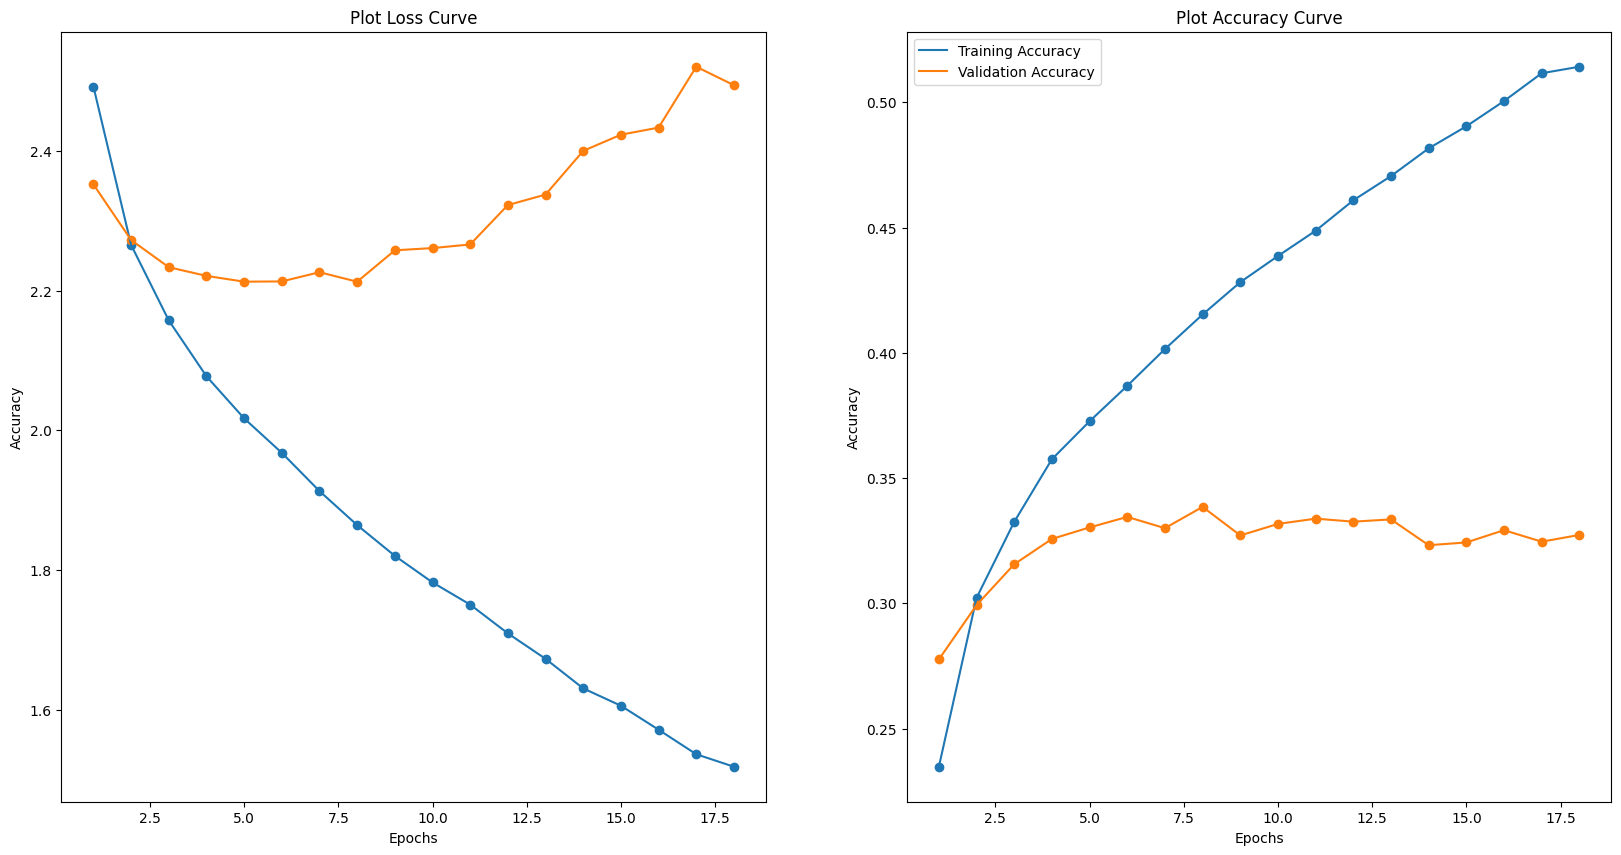

In [35]:
print(storeResult(baseModelHistory))
plot_loss_curve(baseModelHistory)
plt.show()


<u><b>Observations</b></u>

From the loss curve, We can see that as the model increase in epochs, the model becomes more generalise and the loss functions starts decreasing too. However, the accuracy of both training and validation is very low at 41.5% and 33.8%. This means that the model is not very strong at predicting and it is similar to randomly choosing a label. Let's see if augmentations will improve the accuracy.

##### Training baseline model with Data Augmentation

As mentioned previously, we will train the baseline model with the dataset that was augmented.


In [36]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Flatten()(x)
x = Dense(128, 'relu')(x)  # Hidden Layer 1
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(128, 'relu')(x)  # Hidden Layer 3
x = Dense(NUM_CLASS, 'softmax')(x)
baseAugModel = Model(inputs=inputs, outputs=x, name="baselineAug")
baseAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
baseAugModelHistory = baseAugModel.fit(x_train_aug, y_train, epochs=100,
                                 validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 2.5300 - accuracy: 0.2219 - val_loss: 2.3840 - val_accuracy: 0.2620
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 2.3160 - accuracy: 0.2808 - val_loss: 2.2960 - val_accuracy: 0.2972
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 2.2213 - accuracy: 0.3115 - val_loss: 2.3120 - val_accuracy: 0.2976
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 2.1444 - accuracy: 0.3341 - val_loss: 2.2734 - val_accuracy: 0.3094
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0817 - accuracy: 0.3532 - val_loss: 2.2386 - val_accuracy: 0.3204
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0328 - accuracy: 0.3659 - val_loss: 2.2353 - val_accuracy: 0.3195
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.9804 - accuracy: 0.3812 - val_loss: 2.2453 - val_accuracy: 0.3238

{'Model Name': 'baselineAug', 'Epochs': 18, 'Batch Size': 64, 'Train Loss': 1.9318779706954956, 'Val Loss': 2.246060371398926, 'Train Acc': 0.39879998564720154, 'Val Acc': 0.3303000032901764, '[Train - Val] Acc': 0.06849998235702515}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


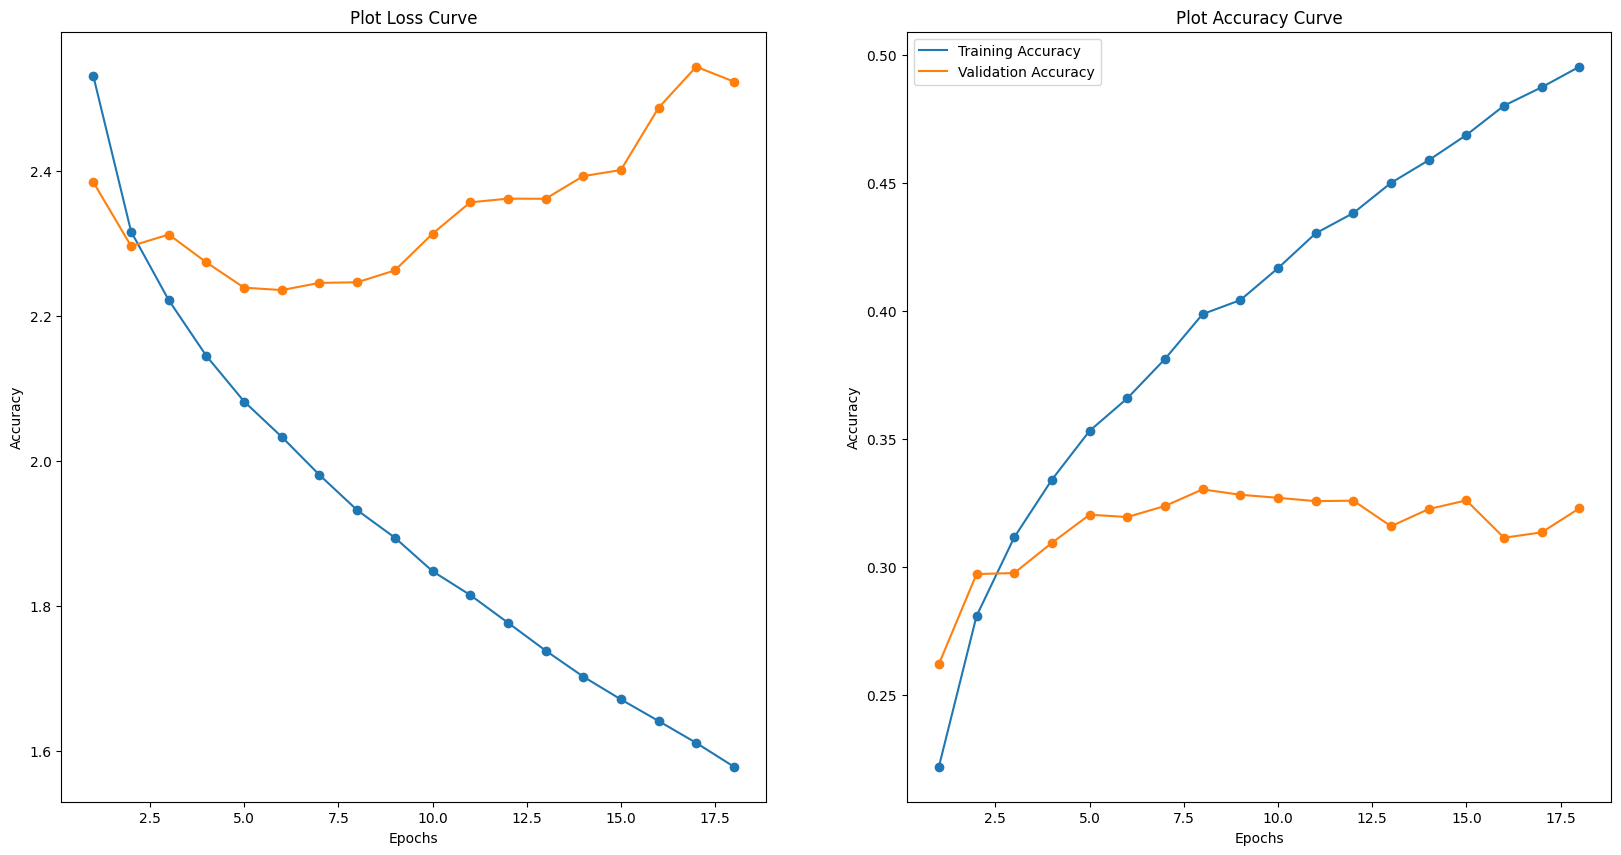

In [38]:
print(storeResult(baseAugModelHistory))
plot_loss_curve(baseAugModelHistory)
plt.show()


<u><b>Observations</b></u>

We can also see that by augmenting the data, we see that even though the accuracy for both training and validation decreased, there is a slight increase in validation loss which means that the model is becoming less generalise to fit to the dataset. However, as the accuracy is still very low, more improvements need to be made to make the model better.

### Conv2D Neural Network Model

After creating our baseline model, we begin making more complex models. We will be building a simple convolutional neural network (CNN). We will be using tensorflow's Conv2D layers to build the models. The reason why we use a CNN architecture is because CNNs are well suited to solve the problem of image classification. This is because the convolution layers consider the context in the local neighbourhood of the input data and constructs features from the neighbourhood. CNNs also reduce the number of parameters in the network due to its sparse connections and weight sharing properties.


##### Training conv2D model without Data Augmentation


In [42]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Conv2D(32, (5, 5), input_shape=IMG_SIZE, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASS, 'softmax')(x)
conv2DModel = Model(inputs=inputs, outputs=x, name="conv2D")
conv2DModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                    loss='categorical_crossentropy', metrics=['accuracy'])


In [43]:
conv2DModel.summary()


Model: "conv2D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0    

In [44]:
conv2DModelHistory = conv2DModel.fit(x_train, y_train, epochs=100,
                                     validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 6s 7ms/step - loss: 2.3483 - accuracy: 0.2802 - val_loss: 2.1053 - val_accuracy: 0.3421
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 2.0330 - accuracy: 0.3711 - val_loss: 2.0199 - val_accuracy: 0.3812
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8514 - accuracy: 0.4250 - val_loss: 1.9394 - val_accuracy: 0.4094
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7116 - accuracy: 0.4683 - val_loss: 1.8677 - val_accuracy: 0.4318
Epoch 5/100
625/625 [==============================] - 3s 6ms/step - loss: 1.5923 - accuracy: 0.5033 - val_loss: 1.8625 - val_accuracy: 0.4396
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.4849 - accuracy: 0.5324 - val_loss: 1.8559 - val_accuracy: 0.4387
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 1.3815 - accuracy: 0.5623 - val_loss: 1.9157 - val_accuracy: 0.4477

{'Model Name': 'conv2D', 'Epochs': 17, 'Batch Size': 64, 'Train Loss': 1.3815046548843384, 'Val Loss': 1.9156562089920044, 'Train Acc': 0.562250018119812, 'Val Acc': 0.44769999384880066, '[Train - Val] Acc': 0.11455002427101135}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


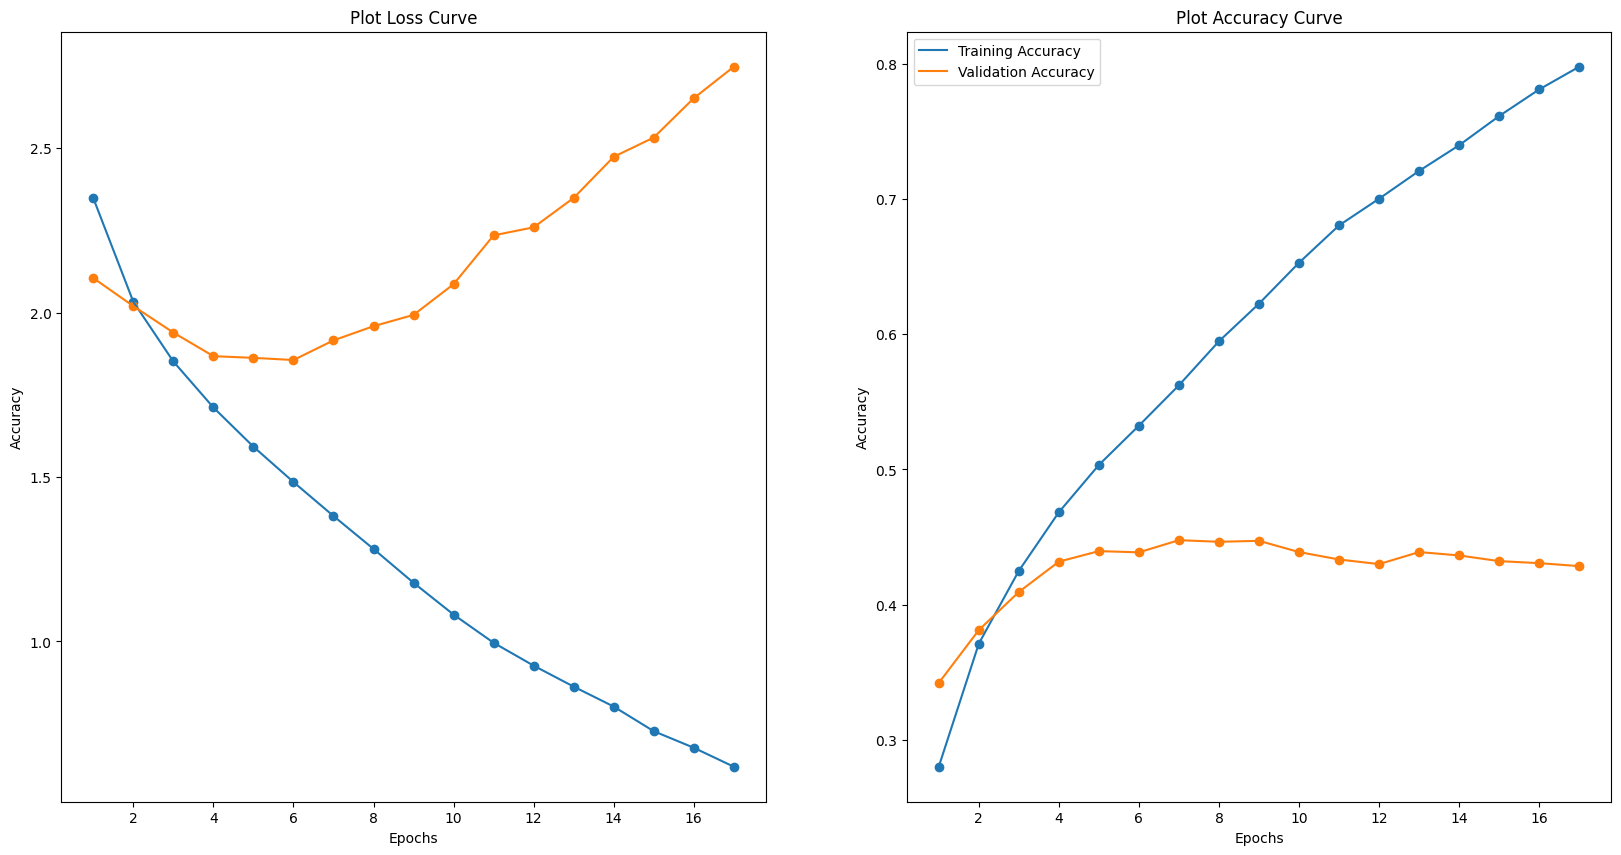

In [45]:
print(storeResult(conv2DModelHistory))
plot_loss_curve(conv2DModelHistory)
plt.show()

<u><b>Observation</b></u>

Comparing the Conv2D model with the baseline model, we can see that there is a significant difference in the training accuracy and validation accuracy. The loss functions decrease suggesting the model is performing better and generalising more 


##### Training conv2D model with Data Augmentation


In [46]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = Conv2D(32, (5, 5), input_shape=IMG_SIZE, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASS, 'softmax')(x)
conv2DAugModel = Model(inputs=inputs, outputs=x, name="conv2DAug")
conv2DAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                    loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
conv2DAugModelHistory = conv2DAugModel.fit(x_train_aug, y_train, epochs=100,
                                     validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/100
625/625 [==============================] - 5s 7ms/step - loss: 2.4169 - accuracy: 0.2588 - val_loss: 2.2181 - val_accuracy: 0.3282
Epoch 2/100
625/625 [==============================] - 4s 6ms/step - loss: 2.0909 - accuracy: 0.3561 - val_loss: 2.0105 - val_accuracy: 0.3849
Epoch 3/100
625/625 [==============================] - 4s 6ms/step - loss: 1.9277 - accuracy: 0.4036 - val_loss: 1.9645 - val_accuracy: 0.3918
Epoch 4/100
625/625 [==============================] - 3s 6ms/step - loss: 1.8065 - accuracy: 0.4402 - val_loss: 1.9325 - val_accuracy: 0.4054
Epoch 5/100
625/625 [==============================] - 3s 6ms/step - loss: 1.6882 - accuracy: 0.4758 - val_loss: 1.9222 - val_accuracy: 0.4143
Epoch 6/100
625/625 [==============================] - 4s 6ms/step - loss: 1.5902 - accuracy: 0.5044 - val_loss: 1.8870 - val_accuracy: 0.4369
Epoch 7/100
625/625 [==============================] - 4s 6ms/step - loss: 1.4838 - accuracy: 0.5352 - val_loss: 1.9222 - val_accuracy: 0.4337

{'Model Name': 'conv2DAug', 'Epochs': 16, 'Batch Size': 64, 'Train Loss': 1.590235948562622, 'Val Loss': 1.887040376663208, 'Train Acc': 0.5043749809265137, 'Val Acc': 0.43689998984336853, '[Train - Val] Acc': 0.06747499108314514}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


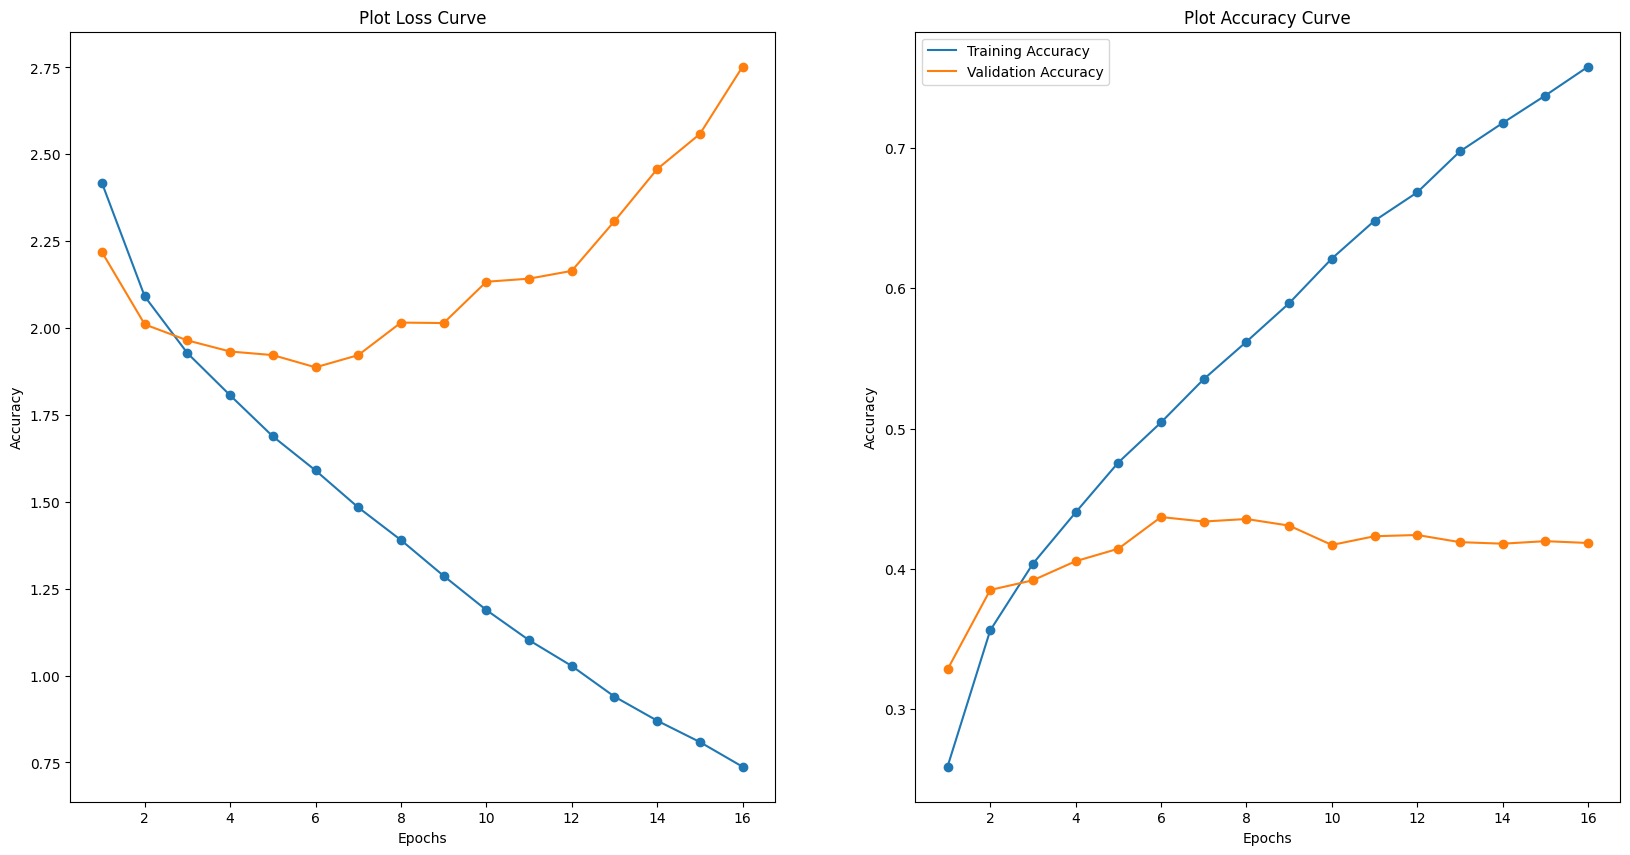

In [48]:
print(storeResult(conv2DAugModelHistory))
plot_loss_curve(conv2DAugModelHistory)
plt.show()

<u><b>Observation</b></u>

Comparing the augmented data trained under the conv2D model, we can see that although both training accuracy and validation accuracy decreased. But the model seem to be more generalise due to the loss functions decreasing. But more should be done.


### CustomVGG Model

VGG-16 is a convolutional neural network that is 16 layers deep.

<img src="https://miro.medium.com/max/828/1*UeAhoKM0kJfCPA03wt5H0A.png">


##### Building the Custom VGG model

From the main VGG16 model, we can see that the VGG network is build based on blocks. Each block contains 2/3 layers of Conv2D and a MaxPooling2D layer. We will build it based on the [https://d2l.ai/chapter_convolutional-modern/vgg.html#]. After the main VGG block has been created, there is a flatten layer followed by 2 fully connected neural networks [relu] which helps the model reach the output layer [softmax].

In [52]:
def vgg_block(num_convs, num_channels):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu'))
        blk.add(
            BatchNormalization())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


##### Training CustomVGG model without Data Augmentation


In [53]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block(2, 64)(x)
x = vgg_block(3, 128)(x)
x = vgg_block(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGModel = Model(inputs=inputs, outputs=x, name="CustomVGG")
customVGGModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
customVGGModelHistory = customVGGModel.fit(x_train, y_train, epochs=50,
                                           validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 15s 21ms/step - loss: 2.4969 - accuracy: 0.2327 - val_loss: 2.1778 - val_accuracy: 0.3171
Epoch 2/50
625/625 [==============================] - 12s 19ms/step - loss: 2.1101 - accuracy: 0.3458 - val_loss: 1.9761 - val_accuracy: 0.3873
Epoch 3/50
625/625 [==============================] - 12s 19ms/step - loss: 1.8423 - accuracy: 0.4256 - val_loss: 1.7330 - val_accuracy: 0.4556
Epoch 4/50
625/625 [==============================] - 12s 19ms/step - loss: 1.6233 - accuracy: 0.4875 - val_loss: 1.6876 - val_accuracy: 0.4846
Epoch 5/50
625/625 [==============================] - 12s 20ms/step - loss: 1.4325 - accuracy: 0.5457 - val_loss: 1.4907 - val_accuracy: 0.5303
Epoch 6/50
625/625 [==============================] - 12s 20ms/step - loss: 1.2759 - accuracy: 0.5922 - val_loss: 1.4395 - val_accuracy: 0.5537
Epoch 7/50
625/625 [==============================] - 12s 20ms/step - loss: 1.1419 - accuracy: 0.6327 - val_loss: 1.4141 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG', 'Epochs': 26, 'Batch Size': 64, 'Train Loss': 0.2934300899505615, 'Val Loss': 1.722504734992981, 'Train Acc': 0.9021999835968018, 'Val Acc': 0.616599977016449, '[Train - Val] Acc': 0.2856000065803528}


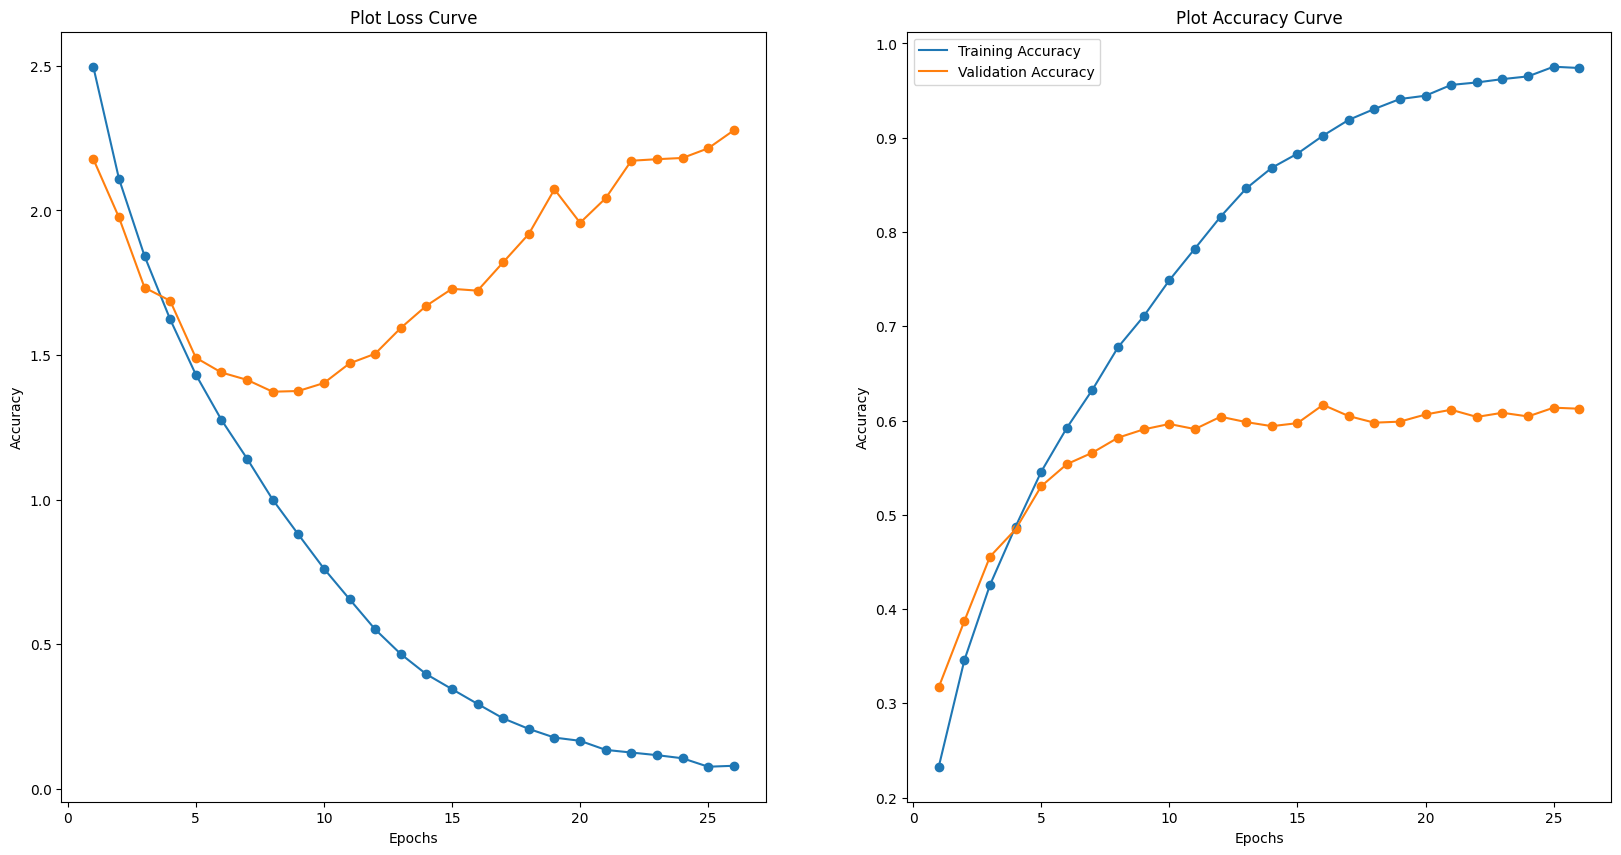

In [55]:
print(storeResult(customVGGModelHistory))
plot_loss_curve(customVGGModelHistory)
plt.show()

<u><b>Observations</b></u>

Comparing our baseline model and customVGG model, we can see that the customVGG model is very overfitted as the validation loss is super high while training loss is super low. We need to do data augmentation etc to reduce overfitting.

##### Training CustomVGG model without Data Augmentation and using L1 Lasso Regularisation




In [56]:
def vgg_block_l1(num_convs, num_channels, weight_decay=0.0005):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l1(weight_decay)))
        blk.add(
            BatchNormalization())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [57]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l1(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l1(2, 64)(x)
x = vgg_block_l1(3, 128)(x)
x = vgg_block_l1(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGL1Model = Model(inputs=inputs, outputs=x, name="CustomVGG_L1")
customVGGL1Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [58]:
customVGGL1ModelHistory = customVGGL1Model.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 19s 27ms/step - loss: 12.4283 - accuracy: 0.2304 - val_loss: 5.9503 - val_accuracy: 0.1721
Epoch 2/50
625/625 [==============================] - 15s 24ms/step - loss: 4.3914 - accuracy: 0.2458 - val_loss: 4.0914 - val_accuracy: 0.2101
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 3.6748 - accuracy: 0.2575 - val_loss: 3.7883 - val_accuracy: 0.2306
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 3.4840 - accuracy: 0.2903 - val_loss: 3.5357 - val_accuracy: 0.2879
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 3.3663 - accuracy: 0.3163 - val_loss: 3.3503 - val_accuracy: 0.3140
Epoch 6/50
625/625 [==============================] - 15s 24ms/step - loss: 3.2469 - accuracy: 0.3437 - val_loss: 3.1672 - val_accuracy: 0.3465
Epoch 7/50
625/625 [==============================] - 15s 24ms/step - loss: 3.1094 - accuracy: 0.3655 - val_loss: 3.2955 - val_accuracy

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG_L1', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 2.2262232303619385, 'Val Loss': 2.30151104927063, 'Train Acc': 0.5532000064849854, 'Val Acc': 0.5271000266075134, '[Train - Val] Acc': 0.026099979877471924}


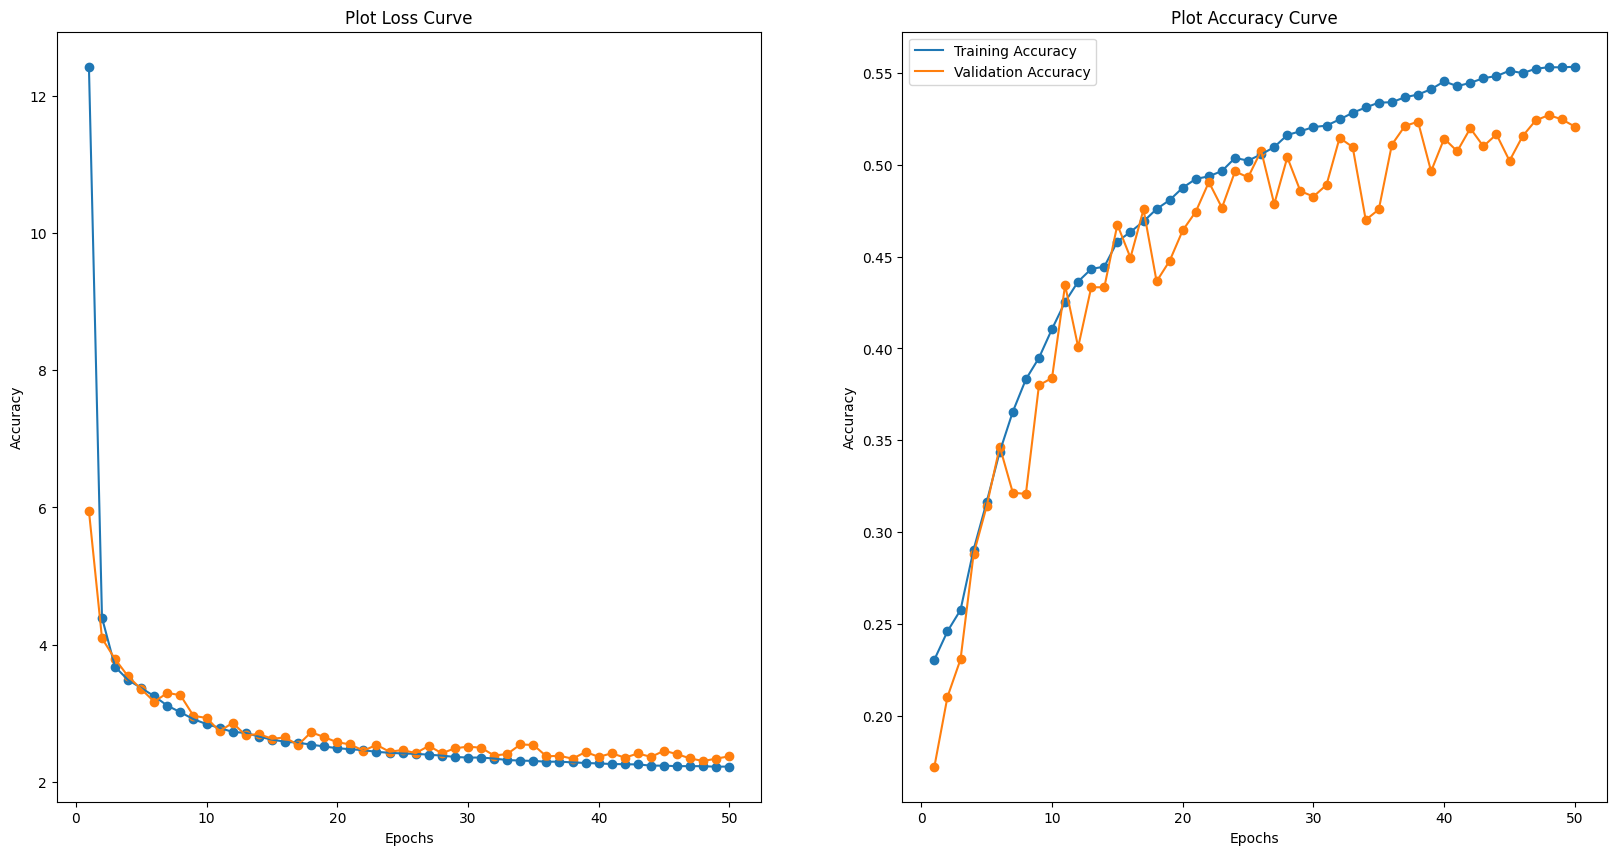

In [59]:
print(storeResult(customVGGL1ModelHistory))
plot_loss_curve(customVGGL1ModelHistory)
plt.show()


<u><b>Observations</b></u>

Even though by applying the L1 Lasso Regularisation, the model becomes generalise as both loss functions decreased. The decrease is consistent but the accuracy of both training and validation is slightly better than baseline and is worst that the normal conv2D model. This suggest the L1 Lasso Regularisation method is not very strong at improving the accuracy of the models.

##### Training CustomVGG model without Data Augmentation and using L2 Ridge Regularisation

In [60]:
def vgg_block_l2(num_convs, num_channels, weight_decay=0.0005):
    blk = Sequential()
    for _ in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
        blk.add(
            BatchNormalization())
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [61]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_l2(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block_l2(2, 64)(x)
x = vgg_block_l2(3, 128)(x)
x = vgg_block_l2(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGL2Model = Model(inputs=inputs, outputs=x, name="CustomVGG_L2")
customVGGL2Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [62]:
customVGGL2ModelHistory = customVGGL2Model.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 19s 26ms/step - loss: 3.0814 - accuracy: 0.2377 - val_loss: 2.8082 - val_accuracy: 0.3148
Epoch 2/50
625/625 [==============================] - 15s 24ms/step - loss: 2.6482 - accuracy: 0.3473 - val_loss: 2.4245 - val_accuracy: 0.4059
Epoch 3/50
625/625 [==============================] - 15s 23ms/step - loss: 2.3533 - accuracy: 0.4278 - val_loss: 2.2297 - val_accuracy: 0.4554
Epoch 4/50
625/625 [==============================] - 15s 25ms/step - loss: 2.1116 - accuracy: 0.4933 - val_loss: 2.1222 - val_accuracy: 0.4874
Epoch 5/50
625/625 [==============================] - 16s 26ms/step - loss: 1.9238 - accuracy: 0.5444 - val_loss: 1.9627 - val_accuracy: 0.5357
Epoch 6/50
625/625 [==============================] - 17s 28ms/step - loss: 1.7848 - accuracy: 0.5808 - val_loss: 1.9456 - val_accuracy: 0.5502
Epoch 7/50
625/625 [==============================] - 16s 25ms/step - loss: 1.6588 - accuracy: 0.6193 - val_loss: 1.9107 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG_L2', 'Epochs': 27, 'Batch Size': 64, 'Train Loss': 1.1758100986480713, 'Val Loss': 2.197413682937622, 'Train Acc': 0.8452000021934509, 'Val Acc': 0.6176999807357788, '[Train - Val] Acc': 0.22750002145767212}


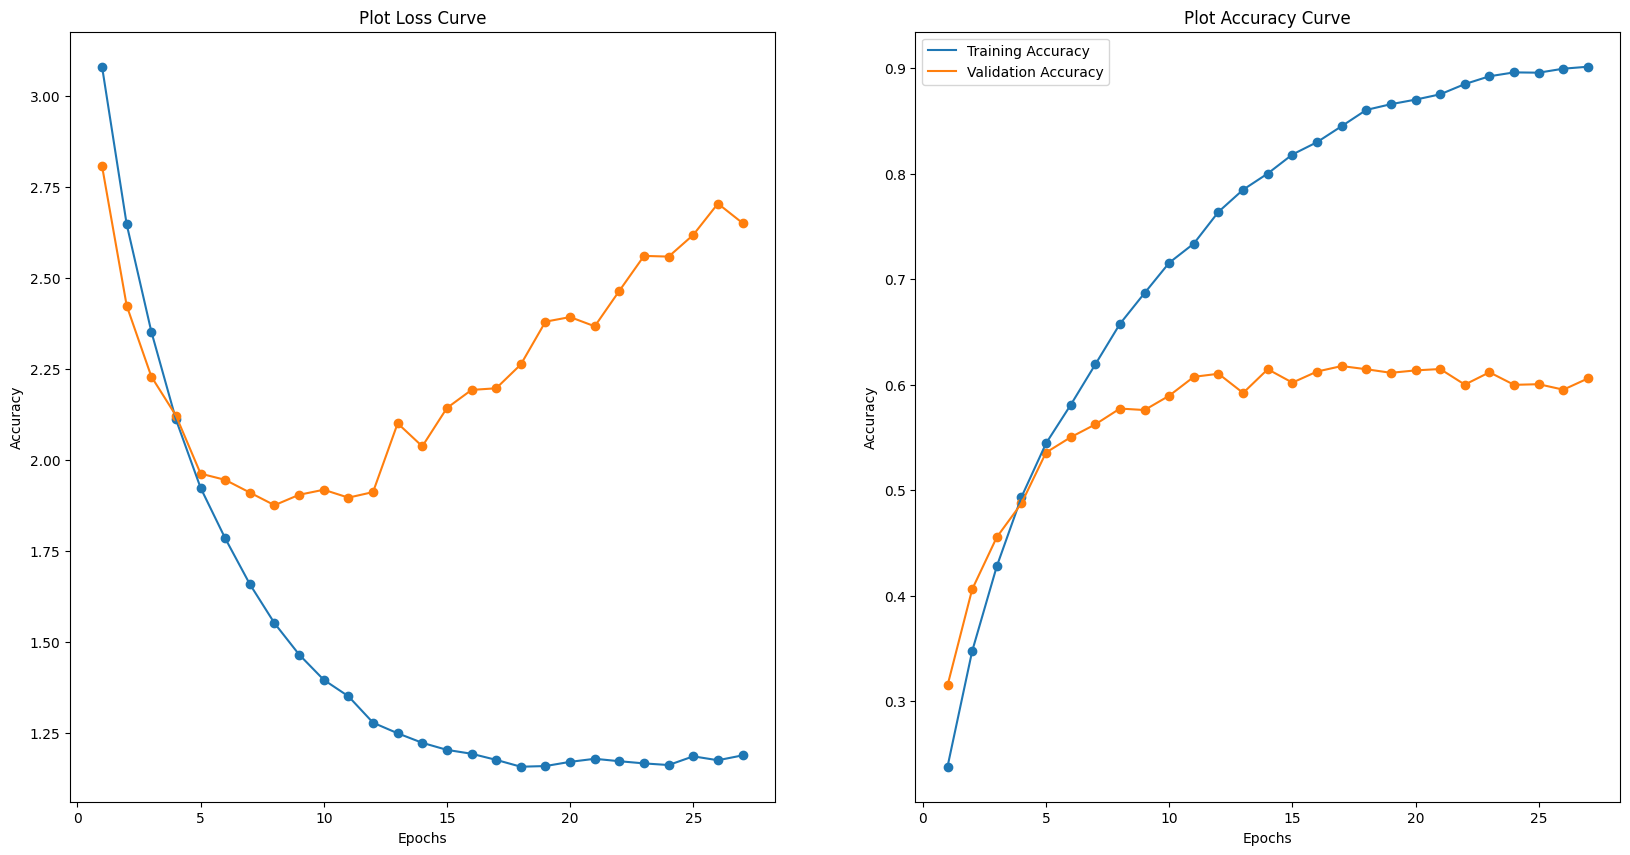

In [63]:
print(storeResult(customVGGL2ModelHistory))
plot_loss_curve(customVGGL2ModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing the CustomVGGL2 model and CustomVGG model, the accuracy of the validation data increased but there is an increase in training loss and validation loss. This suggest that the model has become less generalised even though a regularisation is suppose to help make the model more generalise and reduce overfitting.

##### Training CustomVGG model with Data Augmentation


In [64]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block(2, 32)(x)  # we are using less filters compared to VGG16
x = vgg_block(2, 64)(x)
x = vgg_block(3, 128)(x)
x = vgg_block(3, 256)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGGAugModel = Model(inputs=inputs, outputs=x, name="CustomVGGAug")
customVGGAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                         loss='categorical_crossentropy', metrics=['accuracy'])


In [65]:
customVGGAugModelHistory = customVGGAugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 19s 26ms/step - loss: 2.5015 - accuracy: 0.2336 - val_loss: 2.2258 - val_accuracy: 0.3125
Epoch 2/50
625/625 [==============================] - 14s 22ms/step - loss: 2.1427 - accuracy: 0.3391 - val_loss: 2.0538 - val_accuracy: 0.3684
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 1.9142 - accuracy: 0.4044 - val_loss: 1.7907 - val_accuracy: 0.4447
Epoch 4/50
625/625 [==============================] - 15s 24ms/step - loss: 1.6840 - accuracy: 0.4721 - val_loss: 1.6291 - val_accuracy: 0.4887
Epoch 5/50
625/625 [==============================] - 15s 24ms/step - loss: 1.4995 - accuracy: 0.5219 - val_loss: 1.6067 - val_accuracy: 0.5001
Epoch 6/50
625/625 [==============================] - 16s 26ms/step - loss: 1.3432 - accuracy: 0.5695 - val_loss: 1.4554 - val_accuracy: 0.5451
Epoch 7/50
625/625 [==============================] - 18s 28ms/step - loss: 1.1965 - accuracy: 0.6120 - val_loss: 1.4553 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGGAug', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 0.02670162357389927, 'Val Loss': 2.573303461074829, 'Train Acc': 0.9911249876022339, 'Val Acc': 0.6251999735832214, '[Train - Val] Acc': 0.36592501401901245}


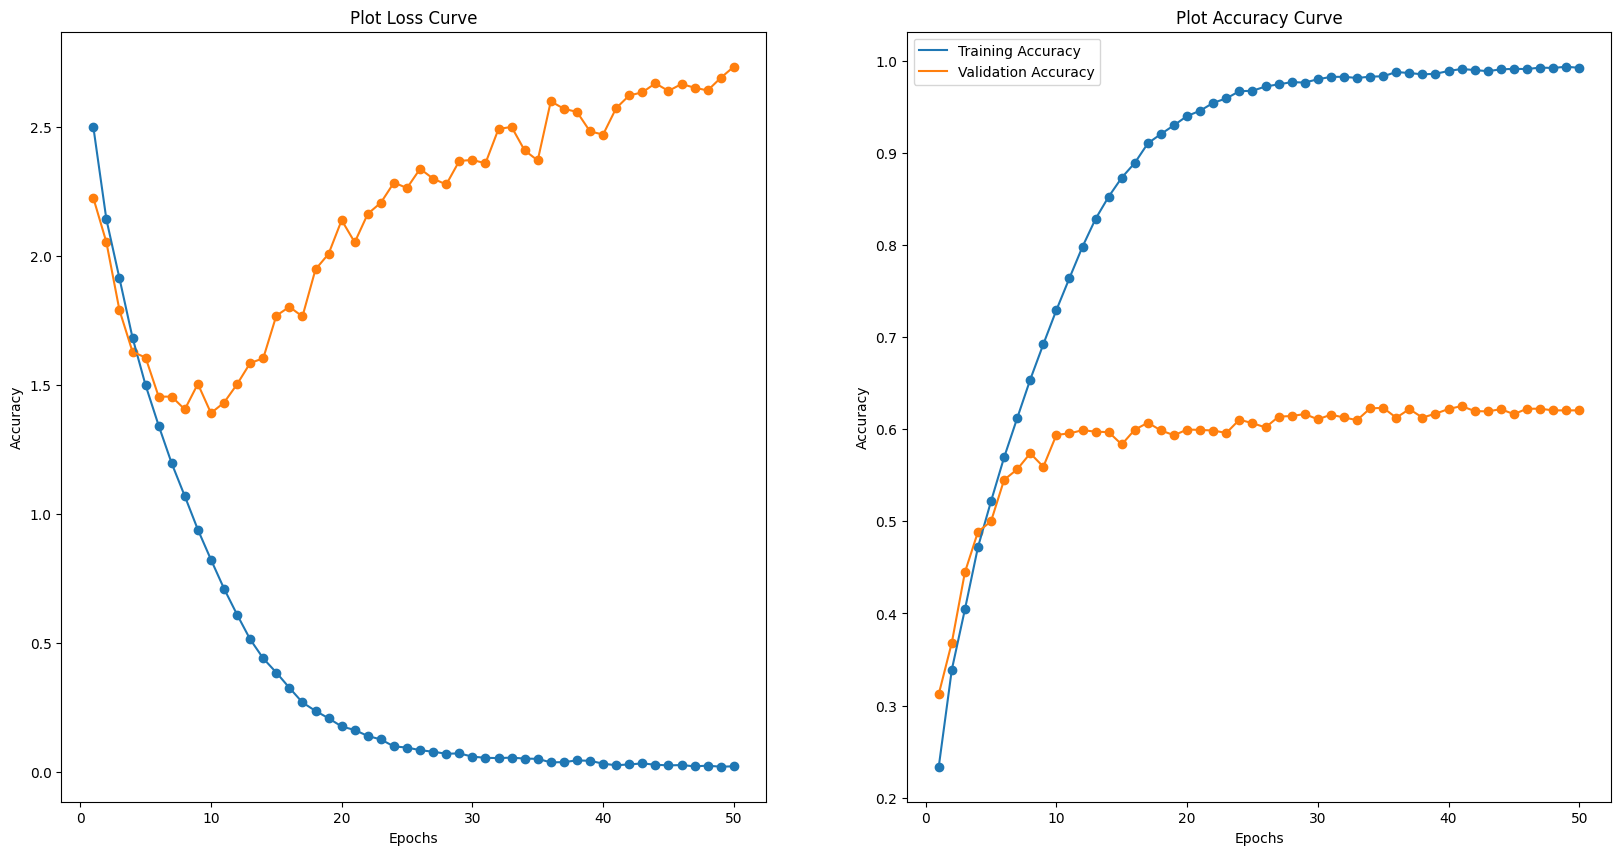

In [66]:
print(storeResult(customVGGAugModelHistory))
plot_loss_curve(customVGGAugModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing customVGG model without Data Augmentation to the customVGG model with Data Augmentation, we can see that by applying augmentation, the validation accuracy increase as well as the training accuracy almost being a 1. This suggest that augmentation is beneficial for a VGG model
 

### CustomVGG16
To reduce overfitting, we will be increasing the number of dropout layers. But to keep the model's performance, we will be increasing the number of layers to match the VGG16 model.

##### CustomVGG-16 model without Data Augmentation


In [25]:
def vgg_block_16(num_convs, num_channels, weight_decay=0.0005, dropout=[]):
    blk = Sequential()    
    while num_convs - len(dropout) > 0:
        dropout.append(0)
    for idx in range(num_convs):
        blk.add(
            Conv2D(num_channels, kernel_size=3,
                   padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
        blk.add(
            BatchNormalization())
        blk.add(Dropout(dropout[idx]))
    blk.add(MaxPool2D(pool_size=2, strides=2))
    return blk


In [71]:
tf.keras.backend.clear_session()
weight_decay = 0.0005
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_16(2, 64,dropout=[0.3])(x)
x = vgg_block_16(2, 128,dropout=[0.4])(x)
x = vgg_block_16(3, 256,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, 'relu',kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGG16Model = Model(inputs=inputs, outputs=x, name="CustomVGG16")
customVGG16Model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [72]:
customVGG16Model.summary()

Model: "CustomVGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 sequential (Sequential)     (None, 16, 16, 64)        39232     
                                                                 
 sequential_1 (Sequential)   (None, 8, 8, 128)         222464    
                                                                 
 sequential_2 (Sequential)   (None, 4, 4, 256)         1478400   
                                                                 
 sequential_3 (Sequential)   (None, 2, 2, 512)         5905920   
                                                       

In [73]:
customVGG16ModelHistory = customVGG16Model.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))

Epoch 1/50
625/625 [==============================] - 48s 69ms/step - loss: 6.4399 - accuracy: 0.1032 - val_loss: 5.8177 - val_accuracy: 0.1154
Epoch 2/50
625/625 [==============================] - 40s 65ms/step - loss: 5.8534 - accuracy: 0.1480 - val_loss: 5.5385 - val_accuracy: 0.1189
Epoch 3/50
625/625 [==============================] - 41s 66ms/step - loss: 5.4876 - accuracy: 0.1663 - val_loss: 5.1920 - val_accuracy: 0.1636
Epoch 4/50
625/625 [==============================] - 42s 68ms/step - loss: 5.0403 - accuracy: 0.1979 - val_loss: 5.0249 - val_accuracy: 0.1731
Epoch 5/50
625/625 [==============================] - 44s 70ms/step - loss: 4.6590 - accuracy: 0.2346 - val_loss: 4.8025 - val_accuracy: 0.1954
Epoch 6/50
625/625 [==============================] - 40s 64ms/step - loss: 4.2845 - accuracy: 0.2650 - val_loss: 4.3416 - val_accuracy: 0.2214
Epoch 7/50
625/625 [==============================] - 40s 63ms/step - loss: 3.9764 - accuracy: 0.2900 - val_loss: 3.9370 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG16', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 1.8089511394500732, 'Val Loss': 2.2840487957000732, 'Train Acc': 0.8012250065803528, 'Val Acc': 0.6850000023841858, '[Train - Val] Acc': 0.11622500419616699}


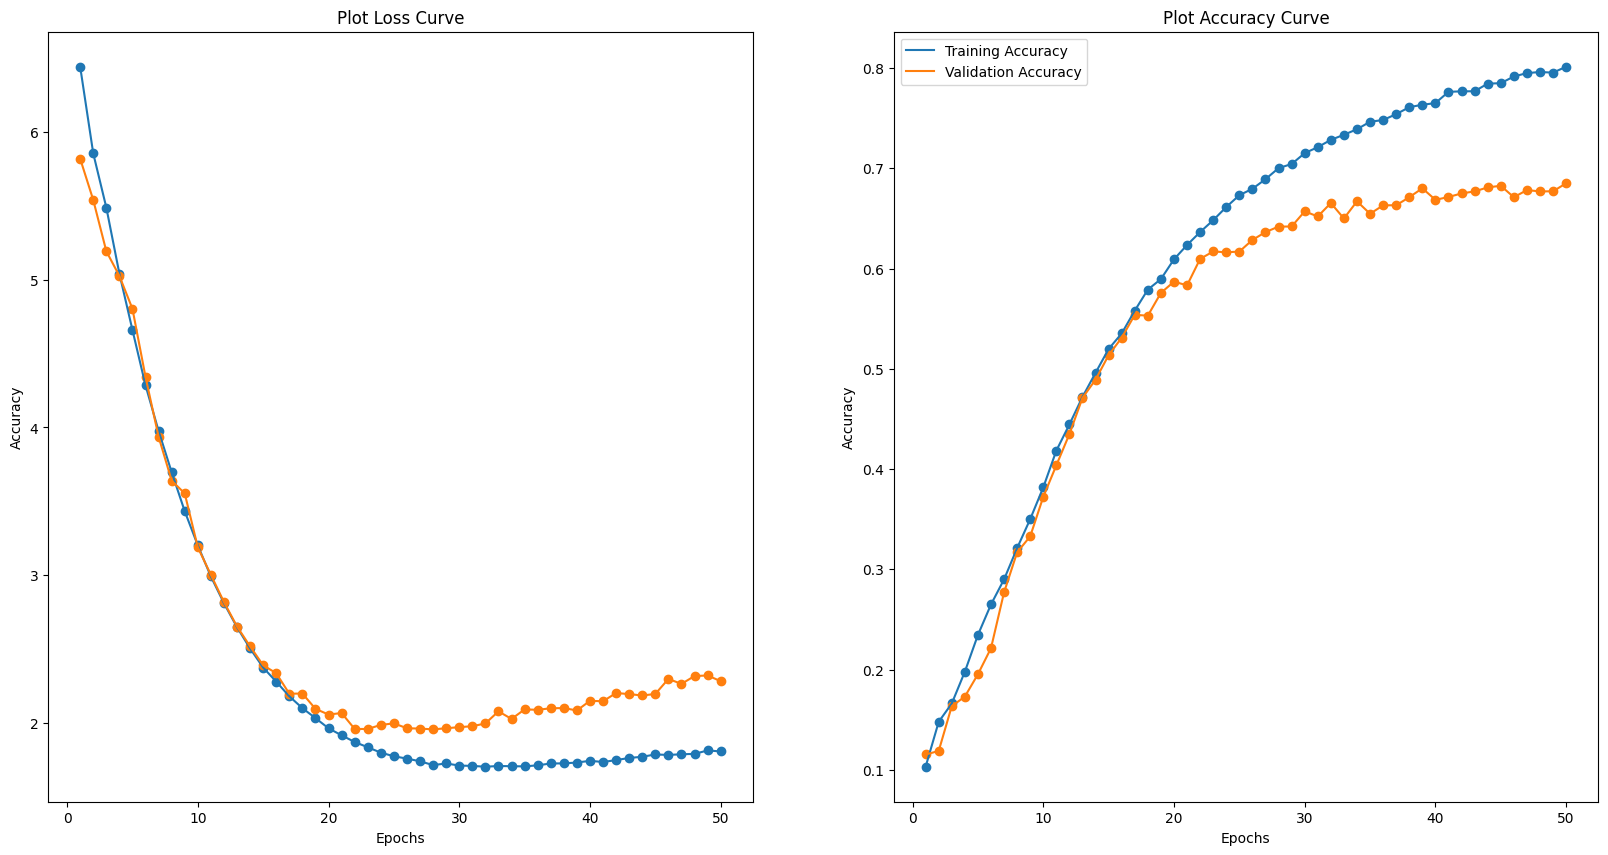

In [74]:
print(storeResult(customVGG16ModelHistory))
plot_loss_curve(customVGG16ModelHistory)
plt.show()

<u><b>Observations</b></u>

We can see that after we have added more dropout layers, the model has become more generalised and that the both loss has been reduced significantly compared to the other models previously. This suggest that we should add more layers and increase the dropout to make model more generalise and prevent overfitting at the same time.

##### CustomVGG-16 model with Data Augmentation

In [75]:
tf.keras.backend.clear_session()
weight_decay = 0.0005
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = vgg_block_16(2, 64,dropout=[0.3])(x)
x = vgg_block_16(2, 128,dropout=[0.4])(x)
x = vgg_block_16(3, 256,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512,dropout=[0.4,0.4])(x)
x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(512, 'relu',kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customVGG16AugModel = Model(inputs=inputs, outputs=x, name="CustomVGG16Aug")
customVGG16AugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                       loss='categorical_crossentropy', metrics=['accuracy'])


In [76]:
customVGG16AugModelHistory = customVGG16AugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 46s 68ms/step - loss: 6.4733 - accuracy: 0.1045 - val_loss: 6.0955 - val_accuracy: 0.1004
Epoch 2/50
625/625 [==============================] - 41s 65ms/step - loss: 5.9481 - accuracy: 0.1470 - val_loss: 5.6866 - val_accuracy: 0.1284
Epoch 3/50
625/625 [==============================] - 41s 65ms/step - loss: 5.4527 - accuracy: 0.1857 - val_loss: 5.3773 - val_accuracy: 0.1537
Epoch 4/50
625/625 [==============================] - 41s 65ms/step - loss: 5.0869 - accuracy: 0.2083 - val_loss: 4.9366 - val_accuracy: 0.1986
Epoch 5/50
625/625 [==============================] - 41s 65ms/step - loss: 4.6927 - accuracy: 0.2386 - val_loss: 4.4823 - val_accuracy: 0.2407
Epoch 6/50
625/625 [==============================] - 41s 65ms/step - loss: 4.3295 - accuracy: 0.2657 - val_loss: 4.1047 - val_accuracy: 0.2759
Epoch 7/50
625/625 [==============================] - 41s 65ms/step - loss: 4.0436 - accuracy: 0.2849 - val_loss: 8.3244 - val_accuracy:

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomVGG16Aug', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 1.811427354812622, 'Val Loss': 2.227701187133789, 'Train Acc': 0.7929999828338623, 'Val Acc': 0.6955999732017517, '[Train - Val] Acc': 0.0974000096321106}


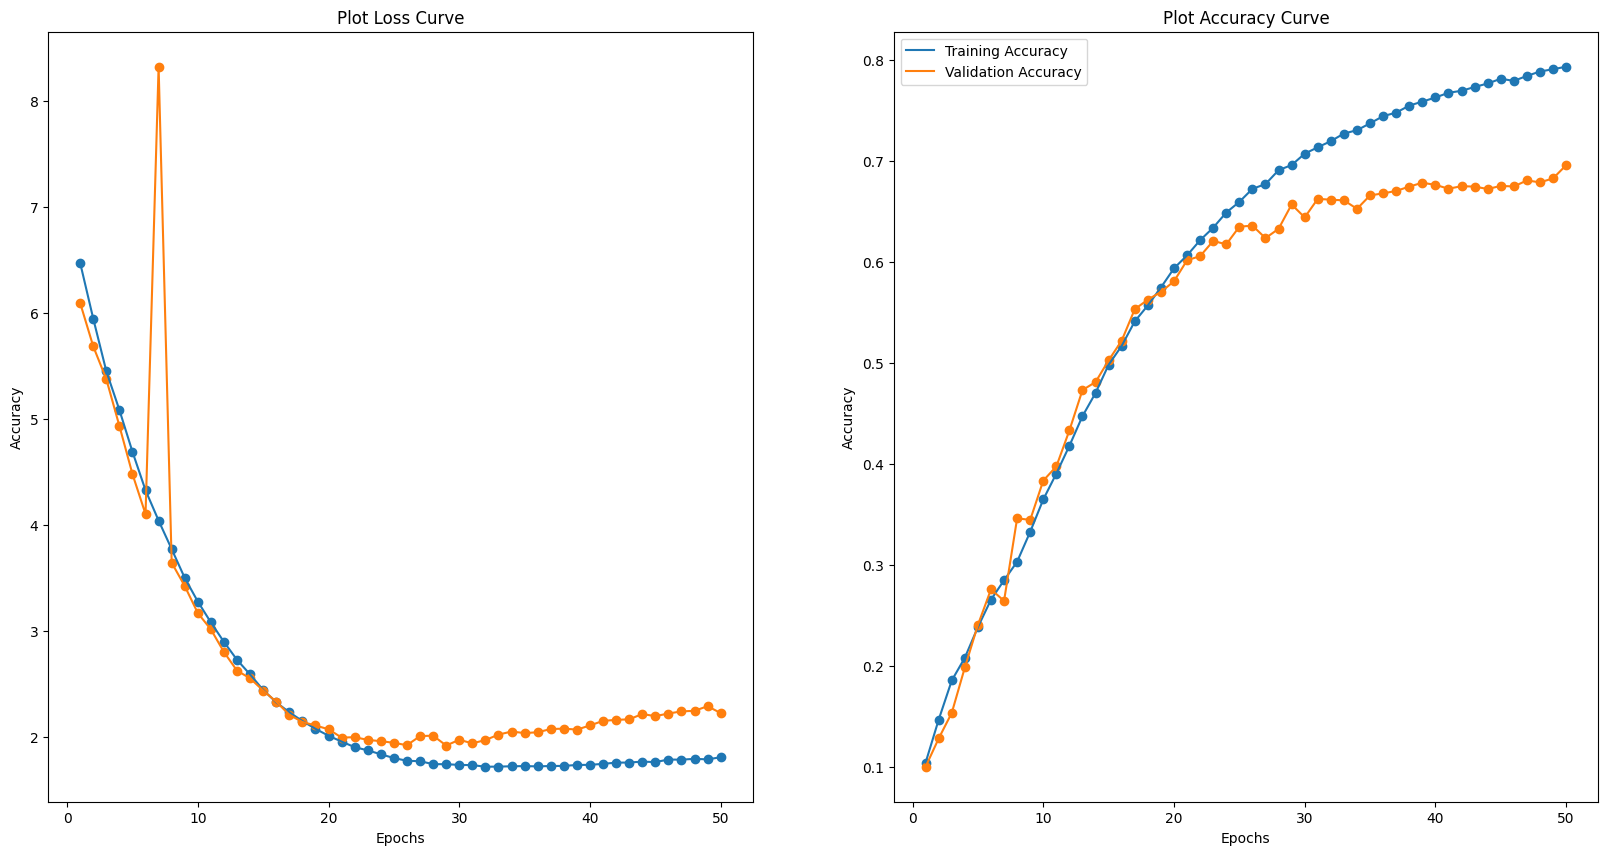

In [77]:
print(storeResult(customVGG16AugModelHistory))
plot_loss_curve(customVGG16AugModelHistory)
plt.show()

<u><b>Observations</b></u>

We note that the model reduced a lot of overfitting and become very generalise and performs better on the augmented dataset compared to the model that was trained without data augmentation. This means data augmentation for this model is very good. 

### CustomResNet Model
ResNets are called Residual Networks. ResNet is a special type of convolutional neural network (CNN). It was first introduced in 2015 by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their paper – "Deep Residual Learning for Image Recognition".

A ResNet model can be called an upgraded version of the VGG architecture with some differences. The ResNet model will skip connections. The following image shows the difference between the ResNet and VGG model as well as a basic conv2D neural network.

<img src="https://cdn-images-1.medium.com/max/1600/1*rOFPhrpfwguotGdB1-BseA.png" style="width: 25%">

As we can see from the diagram, we can see that the ResNet model has skip connections and it jumps the gun between it's layers. So what is the purpose? There are issues with classic neural networks called the vanishing gradient problem. With more layers being added to a neural network, the performance starts dropping due to the aforementioned vanishing gradient problem. To solve this issue, skipping connections [skipping layers] allows us to avoid the vanishing gradient problem.<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*SGrc3VC3fbirosDPW0AmMA.png" style="width: 50%;">


As we can see from the image above, there are 2 types of skip connections, an Identity block [left side] and a Bottleneck / Convolutional block [right side]. The difference is that the Identity block directly adds the residue to the output whereas, the Convolutional block performs a convolution followed by Batch Normalisation on the residue before adding it to the output.

As there are many iterations of the ResNet model, and we found out the main features of ResNet network. We will be coding a small custom ResNet-10 [Number represents number of layers not inclusive of the convolutional blocks [Skip Connection Conv2D]] model based on [https://d2l.ai/chapter_convolutional-modern/resnet.html]


In [81]:
def identity_block(x, filter, weight_decay=0.005):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same',
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [82]:
def convolutional_block(x, filter, weight_decay=0.005):
    x_skip = x
    x = Conv2D(filter, (3, 3), padding='same', strides=(
        2, 2), kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Conv2D(filter, (3, 3), padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x_skip = Conv2D(filter, (1, 1), strides=(2, 2),
                    kernel_regularizer=l2(weight_decay))(x_skip)
    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


##### Training CustomResNet model without Data Augmentation

In [83]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
weight_decay=0.005
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [1, 1, 1, 1]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetModel = Model(inputs=inputs, outputs=x, name="CustomResNet")
customResNetModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [84]:
customResNetModelHistory = customResNetModel.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 21s 29ms/step - loss: 6.1738 - accuracy: 0.3154 - val_loss: 4.4602 - val_accuracy: 0.2800
Epoch 2/50
625/625 [==============================] - 16s 26ms/step - loss: 3.2171 - accuracy: 0.4171 - val_loss: 2.9511 - val_accuracy: 0.3536
Epoch 3/50
625/625 [==============================] - 17s 27ms/step - loss: 2.3653 - accuracy: 0.4651 - val_loss: 2.4351 - val_accuracy: 0.4118
Epoch 4/50
625/625 [==============================] - 16s 26ms/step - loss: 2.1029 - accuracy: 0.4918 - val_loss: 2.2565 - val_accuracy: 0.4530
Epoch 5/50
625/625 [==============================] - 16s 26ms/step - loss: 1.9935 - accuracy: 0.5214 - val_loss: 2.3207 - val_accuracy: 0.4396
Epoch 6/50
625/625 [==============================] - 16s 25ms/step - loss: 1.9496 - accuracy: 0.5397 - val_loss: 2.1622 - val_accuracy: 0.4901
Epoch 7/50
625/625 [==============================] - 16s 26ms/step - loss: 1.9128 - accuracy: 0.5615 - val_loss: 2.3272 - val_accuracy:

{'Model Name': 'CustomResNet', 'Epochs': 29, 'Batch Size': 64, 'Train Loss': 1.7682597637176514, 'Val Loss': 2.5694122314453125, 'Train Acc': 0.7037749886512756, 'Val Acc': 0.5218999981880188, '[Train - Val] Acc': 0.18187499046325684}


C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


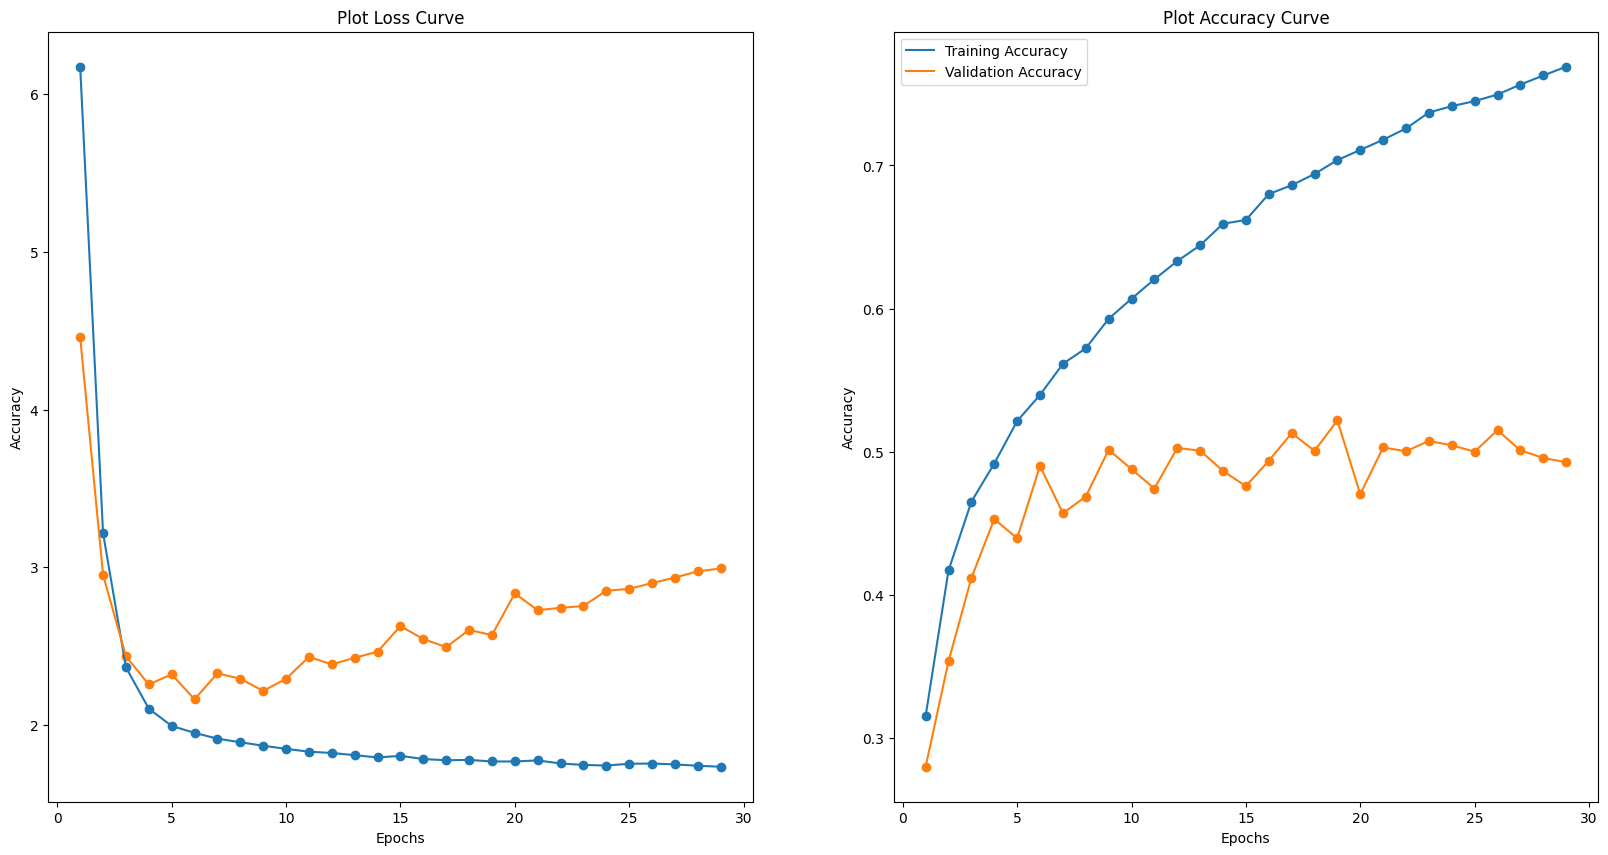

In [85]:
print(storeResult(customResNetModelHistory))
plot_loss_curve(customResNetModelHistory)
plt.show()


<u><b>Observations</b></u>

Comparing the customResNet model to the baseline model, we can see that both train and validation accuracy increased. Train loss is decreased as well which means that the model is generalise to the training data. However, more tuning will be need to change and modify to reduce the loss. 

##### Training CustomResNet model with Data Augmentation

In [86]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
weight_decay=0.005
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same', kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [1, 1, 1, 1]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetAugModel = Model(inputs=inputs, outputs=x, name="CustomResNetAug")
customResNetAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                          loss='categorical_crossentropy', metrics=['accuracy'])


In [87]:
customResNetAugModelHistory = customResNetAugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 20s 29ms/step - loss: 6.2349 - accuracy: 0.2952 - val_loss: 4.2101 - val_accuracy: 0.3454
Epoch 2/50
625/625 [==============================] - 16s 26ms/step - loss: 3.2823 - accuracy: 0.3865 - val_loss: 2.8508 - val_accuracy: 0.3695
Epoch 3/50
625/625 [==============================] - 16s 26ms/step - loss: 2.4298 - accuracy: 0.4358 - val_loss: 2.4110 - val_accuracy: 0.4050
Epoch 4/50
625/625 [==============================] - 16s 26ms/step - loss: 2.1612 - accuracy: 0.4682 - val_loss: 2.3793 - val_accuracy: 0.4139
Epoch 5/50
625/625 [==============================] - 16s 26ms/step - loss: 2.0632 - accuracy: 0.4911 - val_loss: 2.2238 - val_accuracy: 0.4499
Epoch 6/50
625/625 [==============================] - 16s 26ms/step - loss: 2.0057 - accuracy: 0.5139 - val_loss: 2.3339 - val_accuracy: 0.4176
Epoch 7/50
625/625 [==============================] - 16s 26ms/step - loss: 1.9773 - accuracy: 0.5335 - val_loss: 2.3101 - val_accuracy:

{'Model Name': 'CustomResNetAug', 'Epochs': 25, 'Batch Size': 64, 'Train Loss': 1.867211937904358, 'Val Loss': 2.3955774307250977, 'Train Acc': 0.6365000009536743, 'Val Acc': 0.5138000249862671, '[Train - Val] Acc': 0.12269997596740723}

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


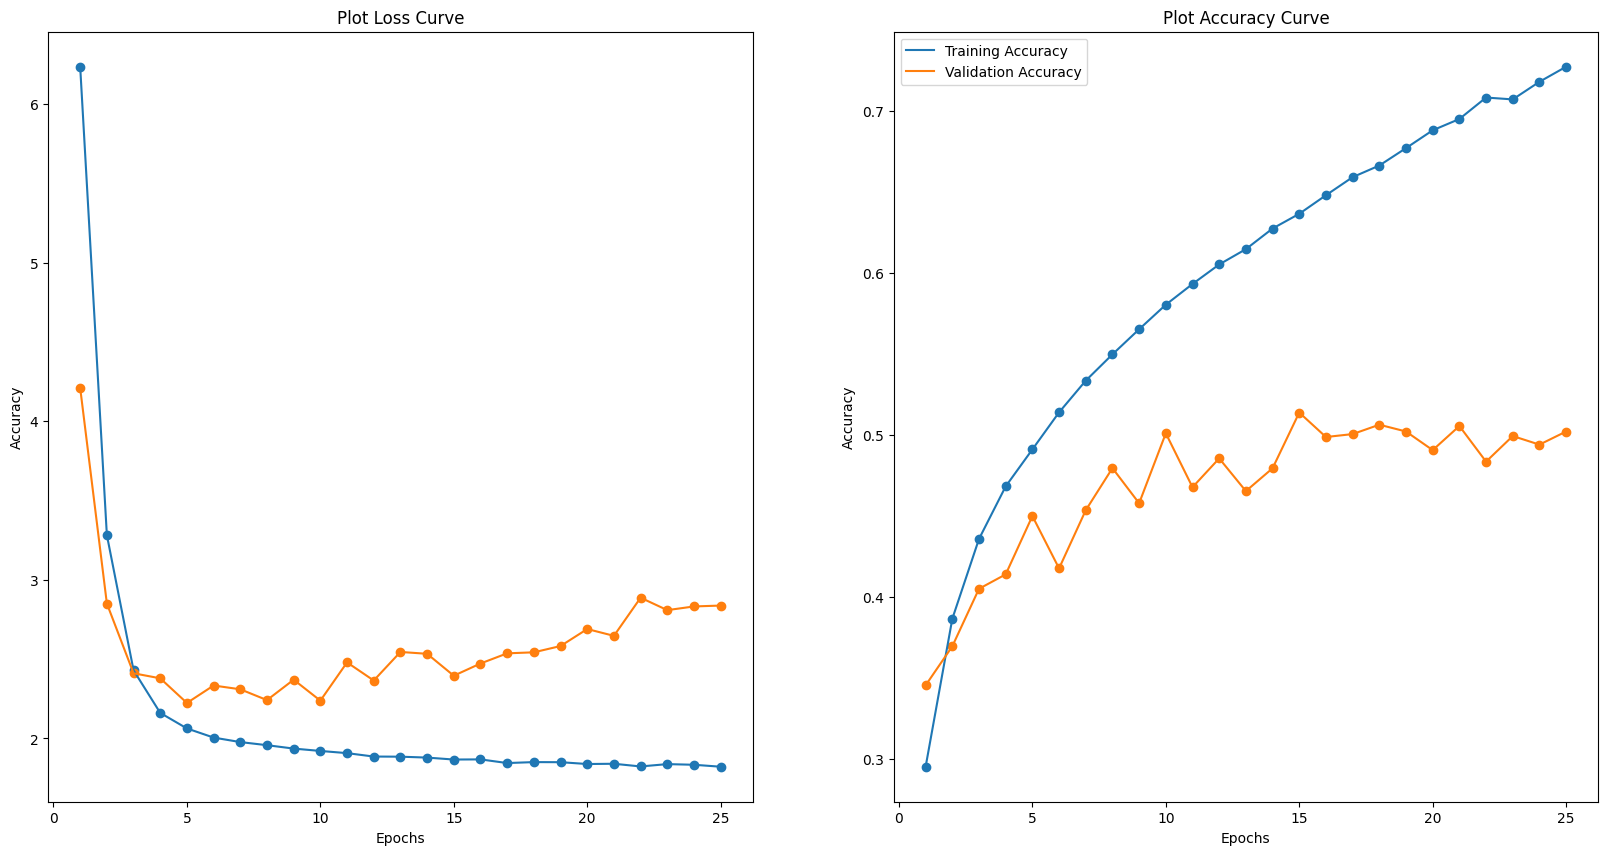

In [88]:
print(storeResult(customResNetAugModelHistory))
plot_loss_curve(customResNetAugModelHistory)
plt.show()


##### CustomResNet model with Dropout Layers

To help reduce the overfitting and reduce the loss of the model, we will be using dropout layers. Dropout layers will randomly sets input units to 0 during the training period. This is means that weights and biases that might affect the model and cause the model to overfit might be ignore (disconnected)

In [92]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
weight_decay = 0.005
x = pre_processing_v1(inputs)
x = ZeroPadding2D((3, 3))(x)
x = Conv2D(64, kernel_size=7, strides=2, padding='same',
           kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
block_layers = [3, 4, 6, 3]
filter_size = 64
for i in range(4):
    if i == 0:
        # For sub-block 1 Residual/Convolutional block not needed
        for j in range(block_layers[i]):
            x = identity_block(x, filter_size)
    else:
        # One Residual/Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        filter_size = filter_size*2
        x = convolutional_block(x, filter_size)
        for j in range(block_layers[i] - 1):
            x = identity_block(x, filter_size)
    x = Dropout(0.3)(x)
x = AveragePooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
customResNetDropModel = Model(
    inputs=inputs, outputs=x, name="CustomResNetDropV2")
customResNetDropModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                                loss='categorical_crossentropy', metrics=['accuracy'])


In [93]:
customResNetDropModel.summary()

Model: "CustomResNetDropV2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 normalization (Normalization)  (None, 32, 32, 3)    7           ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['normalization[17][0]']         
                                                                                                  
 conv2d (Conv2D)                (None, 19, 19, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                 

In [94]:
customResNetDropModelHistory = customResNetDropModel.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 57s 83ms/step - loss: 23.3866 - accuracy: 0.1541 - val_loss: 13.0995 - val_accuracy: 0.1630
Epoch 2/50
625/625 [==============================] - 50s 80ms/step - loss: 8.4237 - accuracy: 0.2553 - val_loss: 5.5296 - val_accuracy: 0.2654
Epoch 3/50
625/625 [==============================] - 50s 81ms/step - loss: 4.2153 - accuracy: 0.2945 - val_loss: 3.4863 - val_accuracy: 0.2869
Epoch 4/50
625/625 [==============================] - 50s 80ms/step - loss: 3.0559 - accuracy: 0.3085 - val_loss: 3.1155 - val_accuracy: 0.2623
Epoch 5/50
625/625 [==============================] - 50s 80ms/step - loss: 2.6269 - accuracy: 0.3415 - val_loss: 2.7369 - val_accuracy: 0.2909
Epoch 6/50
625/625 [==============================] - 50s 80ms/step - loss: 2.5684 - accuracy: 0.3408 - val_loss: 2.6660 - val_accuracy: 0.3154
Epoch 7/50
625/625 [==============================] - 50s 81ms/step - loss: 2.5362 - accuracy: 0.3490 - val_loss: 2.7191 - val_accurac

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'CustomResNetDropV2', 'Epochs': 36, 'Batch Size': 64, 'Train Loss': 2.3125643730163574, 'Val Loss': 2.2459845542907715, 'Train Acc': 0.4689500033855438, 'Val Acc': 0.4781000018119812, '[Train - Val] Acc': -0.009149998426437378}


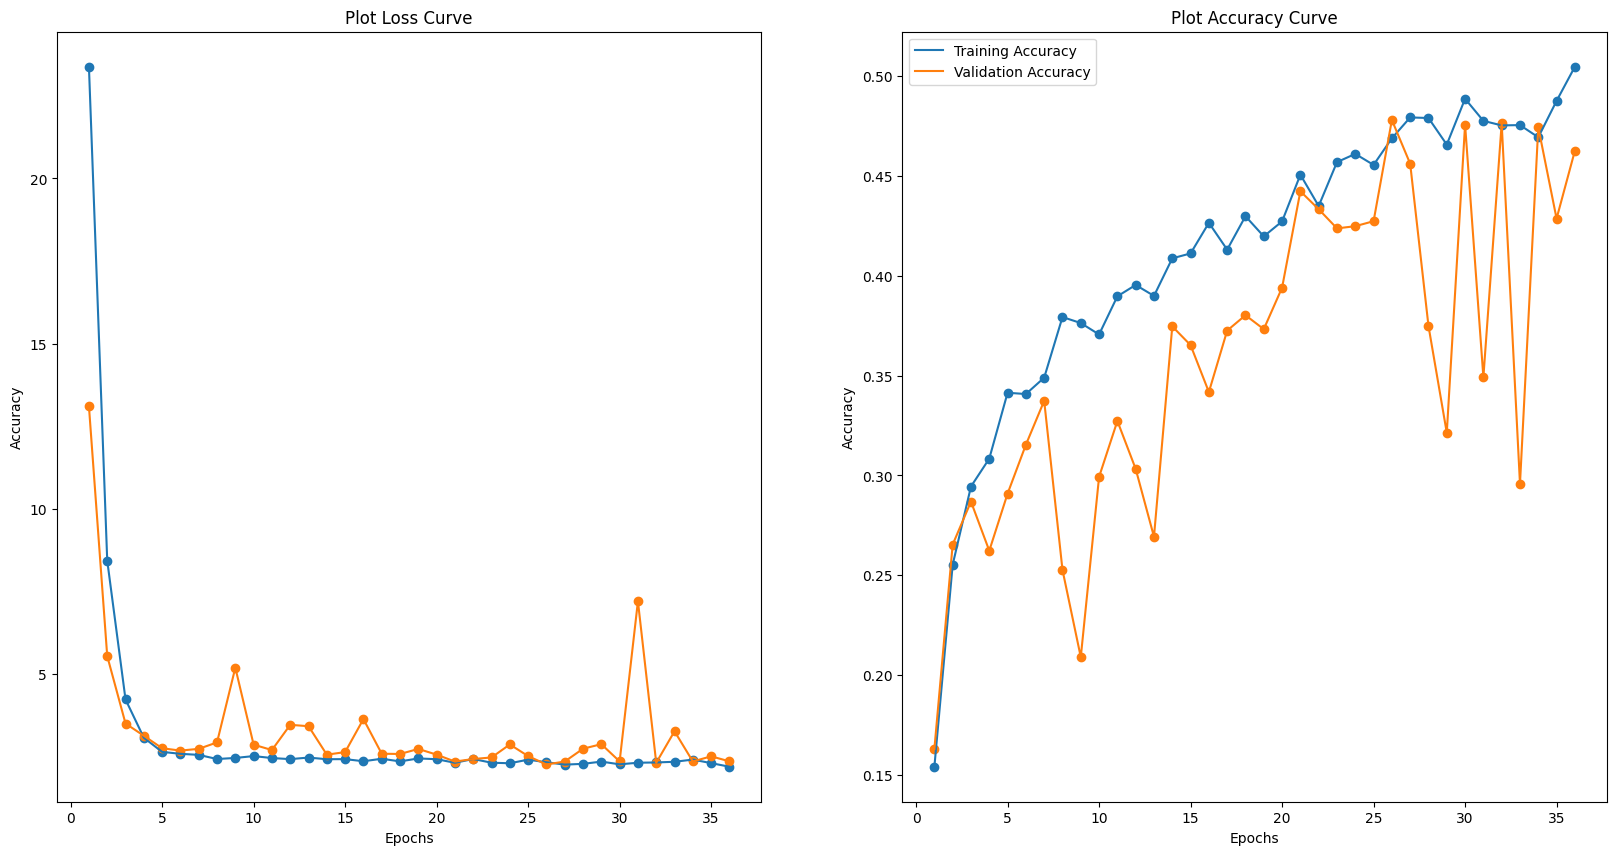

In [95]:
print(storeResult(customResNetDropModelHistory))
plot_loss_curve(customResNetDropModelHistory)
plt.show()


<u><b>Observations</b></u>

We can see that the model has a worst performance after applying dropout. This is likely because of the ResNet's batch normalization layers. When the two layers are put together, there will be a disharmony created. This is due too Batch Normalization layer having a normalization process which use the batch's mean and standard deviation. But the dropout layer will randomly drop the weights and bias in the network. This causes the model to lose the important weights [After the weights have been normalised] that is essential in the model's performance.

### EfficientNetV2 Model

EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients. 

However, the EfficientNet model is quite huge and comprehensive, we will be building a smaller scaled down version introduced by Ming Xing Tan called the EfficientNetV2 model.

##### Deep dive into the EfficientNetV2 network

The EfficientNetV2 model uses extensively the MBConv layer and the fused-MBConv layer as shown below. It also uses a smaller kernel size but adds more layers to compensate for the smaller kernel size. 

<img src="https://media.discordapp.net/attachments/910885868733087747/1043757172590399499/image.png">

Here is how the architecture looks like.

<img src="https://media.discordapp.net/attachments/910885868733087747/1043757858086457374/image.png">

For this model, due to the higher complexity, we will be using a pre build model and removing all the weights and biases to train our own model using transfer learning

##### EfficientNetV2B0 model without Data Augmentation


In [96]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SIZE,
    pooling="max",
    include_preprocessing=False
)(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
efficientNetModel = Model(
    inputs=inputs, outputs=x, name="efficientNetV2")
efficientNetModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                                loss='categorical_crossentropy', metrics=['accuracy'])


In [97]:
efficientNetModel.summary()


Model: "efficientNetV2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 efficientnetv2-b0 (Function  (None, 1280)             5919312   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 20)                25620     
                                                                 
Total params: 5,944,939
Trainable params: 5,884,324


In [98]:
efficientNetModelHistory = efficientNetModel.fit(x_train, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 81s 109ms/step - loss: 2.0214 - accuracy: 0.3828 - val_loss: 1.4868 - val_accuracy: 0.5292
Epoch 2/50
625/625 [==============================] - 67s 106ms/step - loss: 1.3683 - accuracy: 0.5642 - val_loss: 1.2626 - val_accuracy: 0.5982
Epoch 3/50
625/625 [==============================] - 65s 104ms/step - loss: 1.1025 - accuracy: 0.6457 - val_loss: 1.1320 - val_accuracy: 0.6400
Epoch 4/50
625/625 [==============================] - 65s 104ms/step - loss: 0.9173 - accuracy: 0.7020 - val_loss: 1.1043 - val_accuracy: 0.6515
Epoch 5/50
625/625 [==============================] - 66s 105ms/step - loss: 0.7716 - accuracy: 0.7467 - val_loss: 1.1132 - val_accuracy: 0.6594
Epoch 6/50
625/625 [==============================] - 66s 106ms/step - loss: 0.6573 - accuracy: 0.7846 - val_loss: 1.1359 - val_accuracy: 0.6615
Epoch 7/50
625/625 [==============================] - 66s 106ms/step - loss: 0.5619 - accuracy: 0.8130 - val_loss: 1.1492 - val_ac

{'Model Name': 'efficientNetV2', 'Epochs': 50, 'Batch Size': 64, 'Train Loss': 0.044109541922807693, 'Val Loss': 1.7729359865188599, 'Train Acc': 0.9855499863624573, 'Val Acc': 0.6909999847412109, '[Train - Val] Acc': 0.29455000162124634}

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


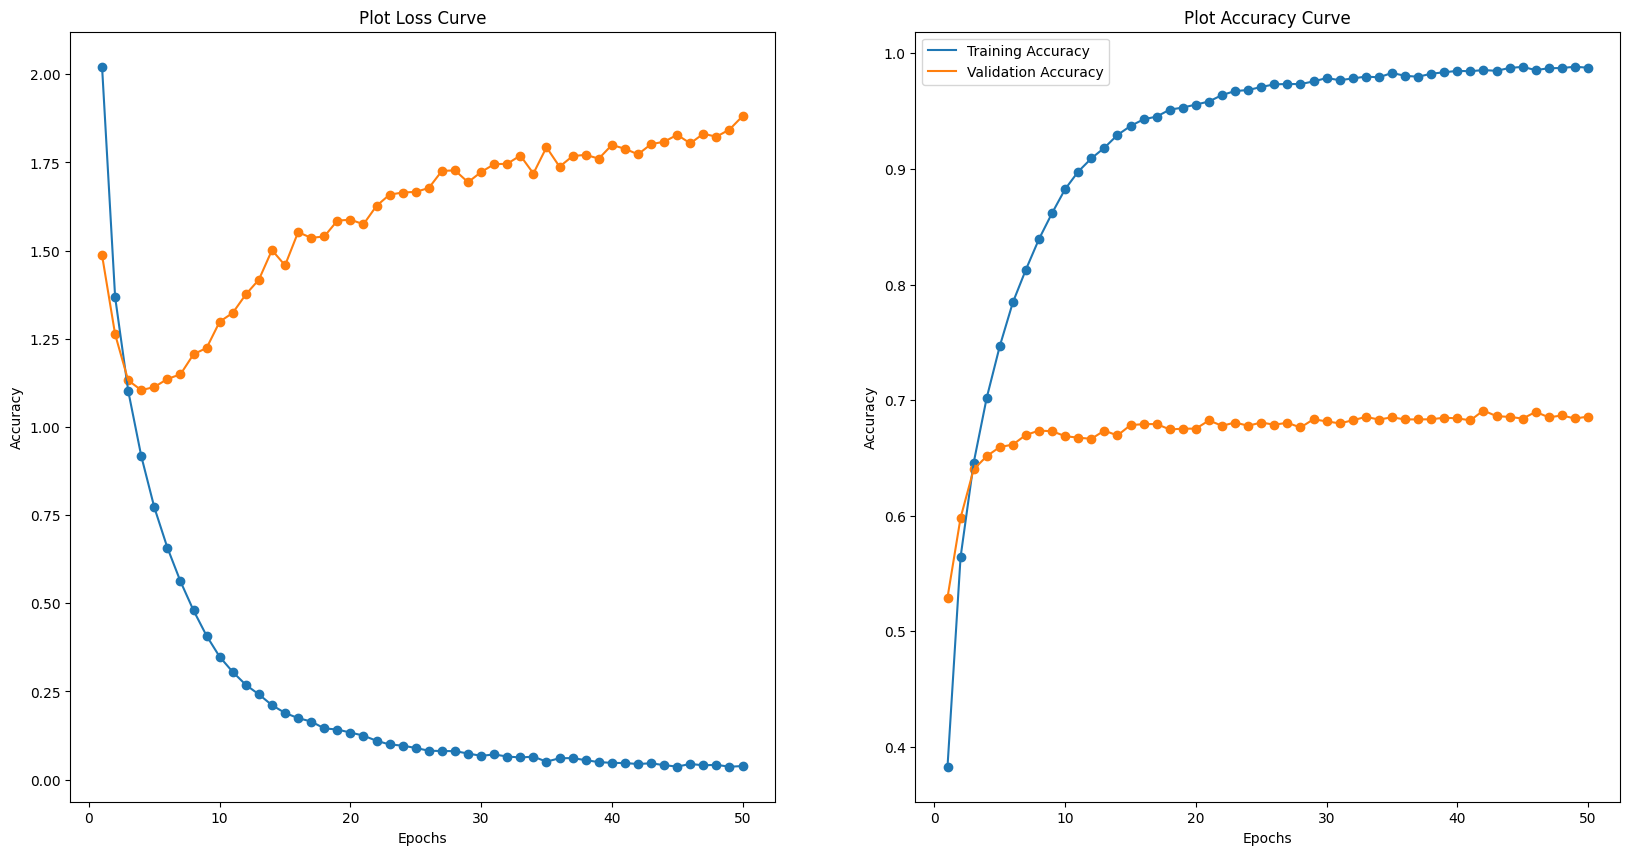

In [99]:
print(storeResult(efficientNetModelHistory))
plot_loss_curve(efficientNetModelHistory)
plt.show()

<u><b>Observation</b></u>

Comparing the EfficientNetV2 Model with the baseline model, we can see that the the model plateau and the model is able to generalise well. The accuracy of both training and validation improved which suggest that efficientNet is a good model.


##### EfficientNetV2B0 model with Data Augmentation


In [100]:
tf.keras.backend.clear_session()
inputs = Input(IMG_SIZE)  # Input
x = pre_processing_v1(inputs)
x = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SIZE,
    pooling="max",
    include_preprocessing=False
)(x)
x = Flatten()(x)
x = Dense(NUM_CLASS, 'softmax')(x)
efficientNetAugModel = Model(
    inputs=inputs, outputs=x, name="efficientNetV2Aug")
efficientNetAugModel.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                                loss='categorical_crossentropy', metrics=['accuracy'])


In [101]:
efficientNetAugModelHistory = efficientNetAugModel.fit(x_train_aug, y_train, epochs=50,
                                               validation_data=(x_val, y_val), batch_size=BATCH_SIZE, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True))


Epoch 1/50
625/625 [==============================] - 75s 103ms/step - loss: 2.1418 - accuracy: 0.3431 - val_loss: 1.5413 - val_accuracy: 0.5078
Epoch 2/50
625/625 [==============================] - 63s 100ms/step - loss: 1.4578 - accuracy: 0.5383 - val_loss: 1.2844 - val_accuracy: 0.5926
Epoch 3/50
625/625 [==============================] - 63s 101ms/step - loss: 1.1859 - accuracy: 0.6184 - val_loss: 1.1871 - val_accuracy: 0.6241
Epoch 4/50
625/625 [==============================] - 63s 100ms/step - loss: 0.9914 - accuracy: 0.6780 - val_loss: 1.1611 - val_accuracy: 0.6410
Epoch 5/50
625/625 [==============================] - 63s 101ms/step - loss: 0.8621 - accuracy: 0.7175 - val_loss: 1.1214 - val_accuracy: 0.6609
Epoch 6/50
625/625 [==============================] - 62s 100ms/step - loss: 0.7247 - accuracy: 0.7599 - val_loss: 1.1301 - val_accuracy: 0.6646
Epoch 7/50
625/625 [==============================] - 62s 99ms/step - loss: 0.6379 - accuracy: 0.7892 - val_loss: 1.1858 - val_acc

C:\Users\Soh Hong Yu\AppData\Local\Temp\ipykernel_20392\3161967465.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allResults = allResults.append(result, ignore_index=True)


{'Model Name': 'efficientNetV2Aug', 'Epochs': 47, 'Batch Size': 64, 'Train Loss': 0.06375440955162048, 'Val Loss': 1.7568185329437256, 'Train Acc': 0.9794250130653381, 'Val Acc': 0.6894999742507935, '[Train - Val] Acc': 0.2899250388145447}


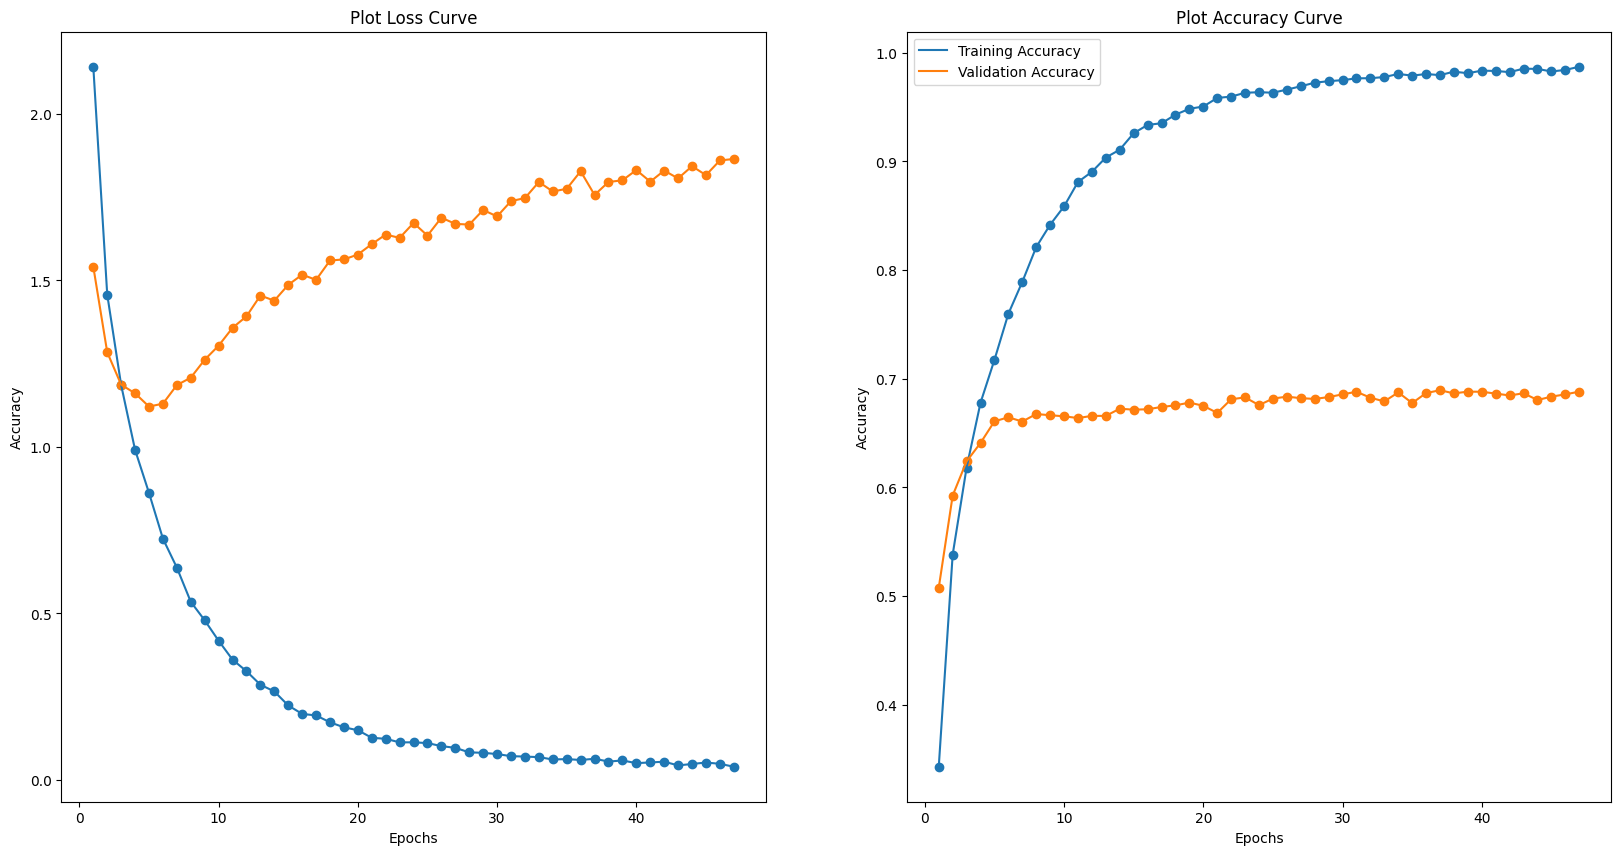

In [102]:
print(storeResult(efficientNetAugModelHistory))
plot_loss_curve(efficientNetAugModelHistory)
plt.show()

# Model Selection

After running the different types of model, we need to decide on one of the model to be hyper tuned to be our final model


In [106]:
allResults.sort_values(by=["Val Acc", "Train Acc"], ascending=False).style.apply(
    lambda x: [
        "background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)


It seems like the CustomVGG16 Augmented model performed the best followed by the pretrained efficientNetV2 model. Therefore we will be making model improvements to the customVGG16 model.


# Model Improvement - customVGG16

We will doing the following to tune the VGG models.

- Using the Cosine Annealing Learning Rate Scheduler
- Use Keras Tuner to do a search to fine


In [26]:
steps_per_epoch = np.ceil(len(x_train) / BATCH_SIZE)


In [27]:
def tune_vgg16_model(hp):
    weight_decay = hp.Float("weight_decay", min_value=3e-4,
                            max_value=1e-2, sampling="log")
    learning_rate = hp.Float(
        "learning_rate", min_value=1e-3, max_value=1e-1, sampling="log")
    scheduler = tf.keras.optimizers.schedules.CosineDecay(
        learning_rate, 50 * steps_per_epoch)
    optimizer = SGD(learning_rate=scheduler, momentum=0.9)
    inputs = Input(IMG_SIZE)
    x = pre_processing_v1(inputs)
    x = vgg_block_16(2, 64, dropout=[0.3])(x)
    x = vgg_block_16(2, 128, dropout=[0.4])(x)
    x = vgg_block_16(3, 256, dropout=[0.4, 0.4])(x)
    x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
    x = vgg_block_16(3, 512, dropout=[0.4, 0.4])(x)
    x = Dropout(0.5)(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, 'relu', kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(NUM_CLASS, 'softmax')(x)
    model = Model(inputs=inputs, outputs=x, name="tuneVGG16")
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [28]:
VGG16Tuner = kt.RandomSearch(tune_vgg16_model, objective="val_accuracy", overwrite=True, project_name="cifar20_vgg16",max_trials=3)


In [29]:
VGG16Tuner.search(
    x_train_aug, y_train, validation_data=(x_val, y_val), epochs=60, batch_size=BATCH_SIZE, callbacks=[
        EarlyStopping(monitor="val_accuracy", patience=10,
                      restore_best_weights=True)
    ]
)
VGG16Tuner.results_summary(num_trials=3)


Trial 3 Complete [01h 54m 28s]
val_accuracy: 0.7368000149726868

Best val_accuracy So Far: 0.7368000149726868
Total elapsed time: 03h 16m 42s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\cifar20_vgg16
Showing 3 best trials
Trial summary
Hyperparameters:
weight_decay: 0.0028624153363848836
learning_rate: 0.050483592250525275
Score: 0.7368000149726868
Trial summary
Hyperparameters:
weight_decay: 0.0010914879067787544
learning_rate: 0.014859884666119429
Score: 0.7161999940872192
Trial summary
Hyperparameters:
weight_decay: 0.008132173395641411
learning_rate: 0.010873828384308268
Score: 0.7138000130653381


# Tuned Model Selection

In [30]:
vgg16_model = VGG16Tuner.get_best_models()[0]

# Model Evaluation

Now it is time to evaluate my final model. To ensure it generalise well, We want to ensure the accuracy on the testing set consistent with that on the validation set.


### Saving model


In [32]:
vgg16_model.save('models/Cifar10CustomVGG16 - Final')
efficientNetModel.save('models/Cifar10EfficientNetV2')

INFO:tensorflow:Assets written to: models/Cifar10CustomVGG16 - Final\assets


INFO:tensorflow:Assets written to: models/Cifar10CustomVGG16 - Final\assets


In [35]:
vgg16_model.save('models/Cifar10CustomVGG16 - Final.h5')
efficientNetModel.save('models/Cifar10EfficientNetV2.h5')

### Initiate model after tuning and saving


In [36]:
final_model = tf.keras.models.load_model('models/Cifar10CustomVGG16 - Final')

final_model.summary()


Model: "tuneVGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 3)        7         
 n)                                                              
                                                                 
 sequential (Sequential)     (None, 16, 16, 64)        39232     
                                                                 
 sequential_1 (Sequential)   (None, 8, 8, 128)         222464    
                                                                 
 sequential_2 (Sequential)   (None, 4, 4, 256)         1478400   
                                                                 
 sequential_3 (Sequential)   (None, 2, 2, 512)         5905920   
                                                         

### Testing Set

After training our model, we need to use the test set to test the model accuracy of the model for unseen data.


In [37]:
final_model.evaluate(x_test, y_test)


313/313 [==============================] - 17s 19ms/step - loss: 1.8333 - accuracy: 0.7337


[1.8333473205566406, 0.7336999773979187]

In [38]:
y_pred = final_model.predict(x_test)


313/313 [==============================] - 14s 44ms/step


In [39]:
report = classification_report(
    np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=class_labels.values()
)
print(report)

                                precision    recall  f1-score   support

               aquatic mammals       0.55      0.69      0.61       500
                          fish       0.73      0.65      0.69       500
                       flowers       0.88      0.81      0.84       500
               food containers       0.78      0.78      0.78       500
          fruit and vegetables       0.82      0.83      0.82       500
  household electrical devices       0.68      0.73      0.70       500
           household furniture       0.86      0.82      0.84       500
                       insects       0.80      0.67      0.73       500
              large carnivores       0.65      0.66      0.65       500
 large man-made outdoor things       0.82      0.85      0.83       500
  large natural outdoor scenes       0.76      0.90      0.82       500
large omnivores and herbivores       0.69      0.67      0.68       500
          medium-sized mammals       0.66      0.61      0.64  

We can see from the classification report that the model is very good at identifying and differentiating trees, flowers and people but not as good as predicting aquatic mammals, reptiles, small mammals and non-insect invertebrates. Let's do a mini error analysis and find out why.


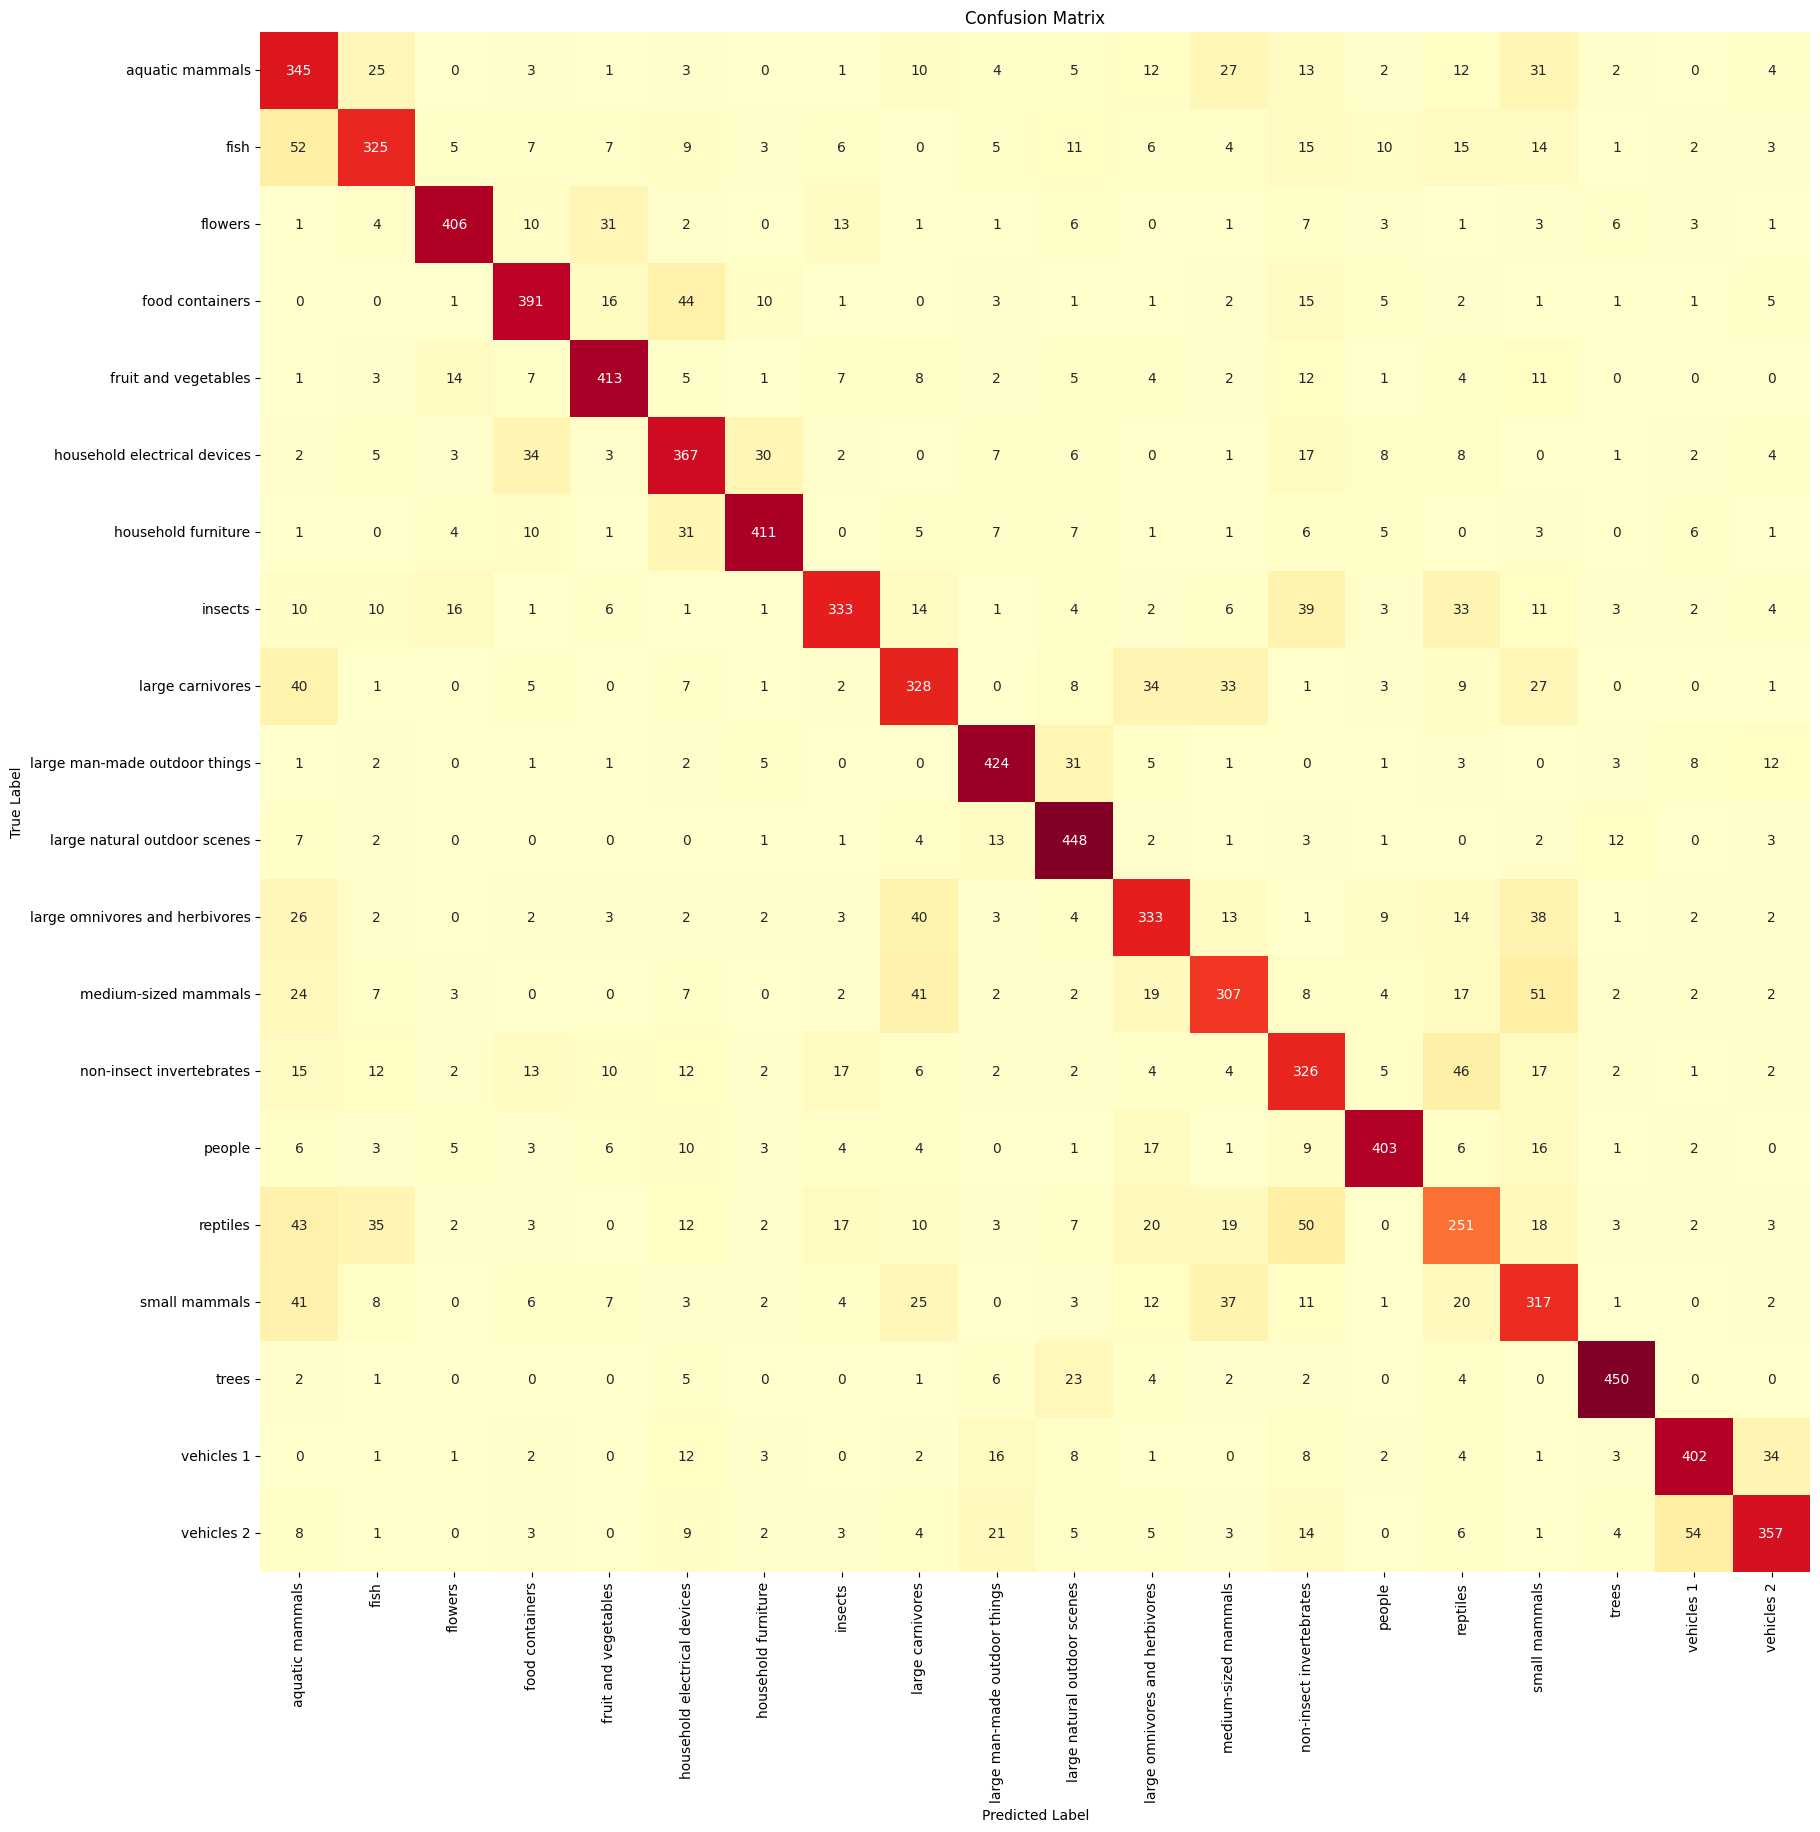

In [40]:
plt.figure(1, figsize=(20, 20))
plt.title("Confusion Matrix")
sns.heatmap(tf.math.confusion_matrix(
    np.argmax(y_test, axis=1),
    np.argmax(y_pred, axis=1),
    num_classes=NUM_CLASS,
    dtype=tf.dtypes.int32,
    name=None
), annot=True, fmt="", cbar=False, cmap="YlOrRd", yticklabels=class_labels.values(), xticklabels=class_labels.values())
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


### Error Analysis


In [41]:
wrong = (np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))
x_test_wrong = x_test[wrong]
y_test_wrong = np.argmax(y_test[wrong], axis=1)
y_pred_wrong = y_pred[wrong]


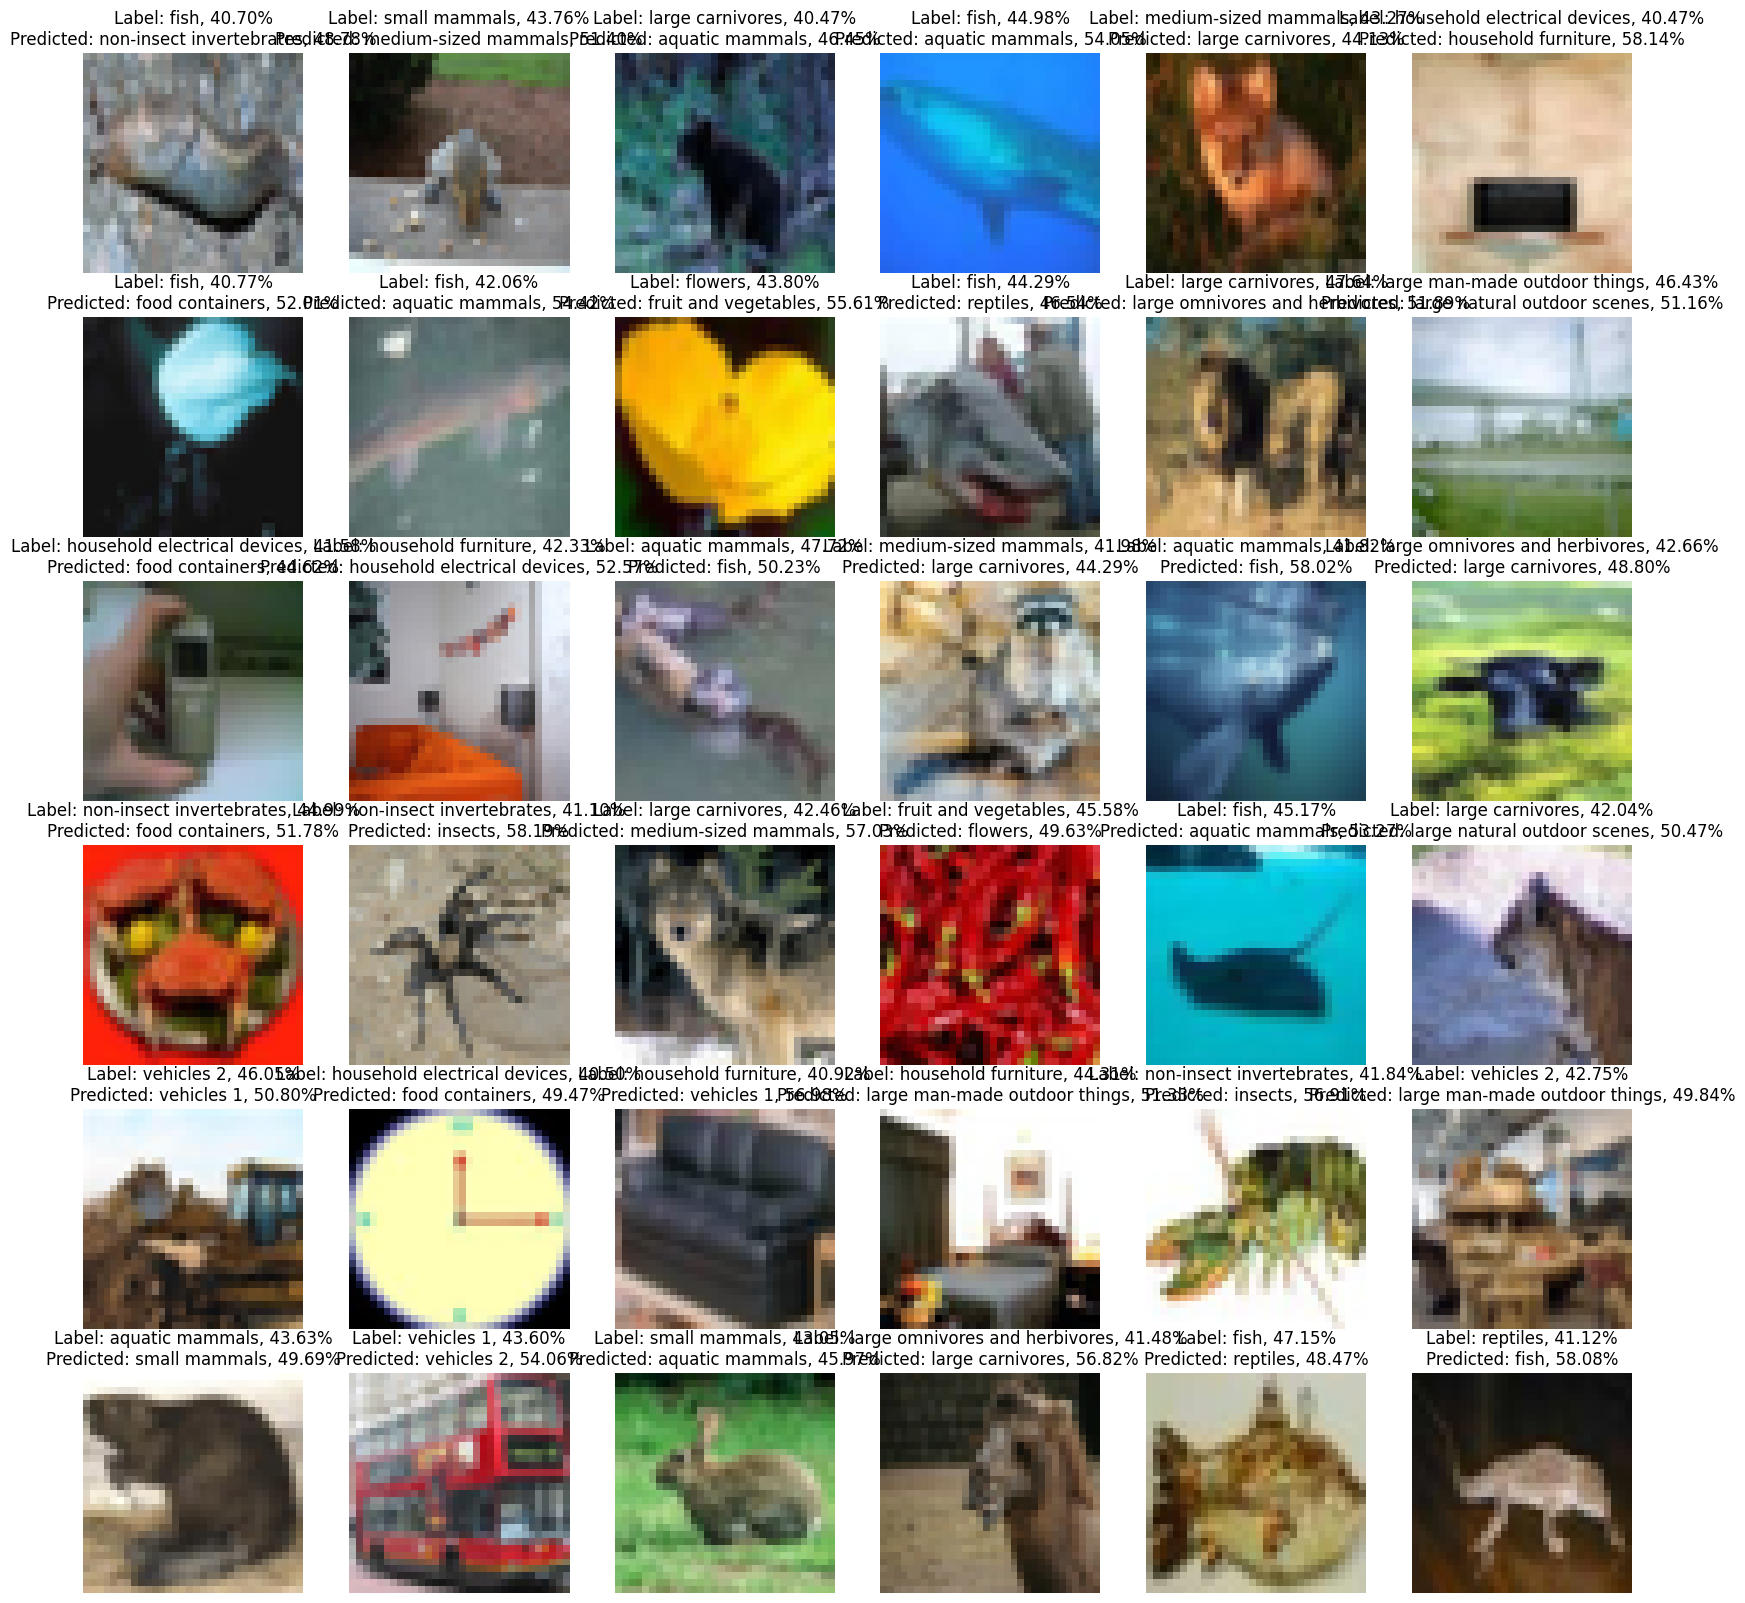

In [42]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))
existArr = []
for subplot in ax.ravel():
    idx = np.random.choice(x_test_wrong.shape[0], 1, replace=False)
    while (y_pred_wrong[idx][0][int(y_test_wrong[idx])] * 100) <= 40 or idx in existArr:
        idx = np.random.choice(x_test_wrong.shape[0], 1, replace=False)
    pred = class_labels[np.argmax(y_pred_wrong[idx])]
    subplot.axis("off")
    actual = class_labels[int(y_test_wrong[idx])]
    subplot.imshow(x_test_wrong[idx].reshape(32, 32, 3))
    subplot.set_title(f"""Label: {actual}, {(y_pred_wrong[idx][0][int(y_test_wrong[idx])] * 100):.2f}%
Predicted: {pred}, {(np.max(y_pred_wrong[idx]) * 100):.2f}%""")
    existArr.append(idx)


<u><b>Observations</b></u>

When we look at the examples that the model made a wrong prediction, we can identify some reasons why it is the case.

1. Low pixel resolutions makes images hard to be distinguished.
   - Example: Row 2 Column 2<br>That images looks a bunch of pixels [Due to low resolutions] and it is hard to distinguish the features.
2. Close Up
   - Example: Row 3 Column 4<br>The model predicted the values of a medium sized mammals and large carnivores wrongly. This is likely due to image very close and making it seem like the animal is a carnivores based on the teeth in the image.

Therefore, it appears that the model's mistakes are reasonable.


# Model Visualisation


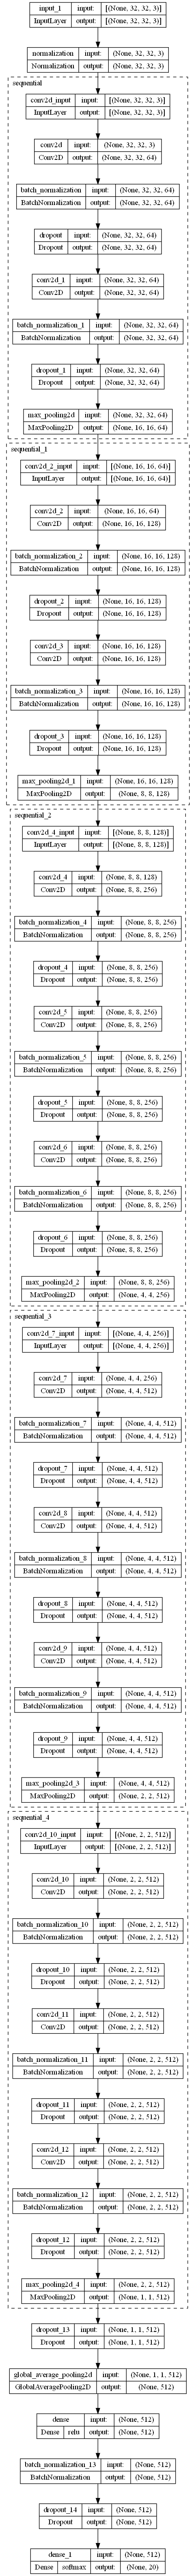

In [43]:
tf.keras.utils.plot_model(final_model, show_shapes=True,
                          expand_nested=True, show_layer_activations=True)


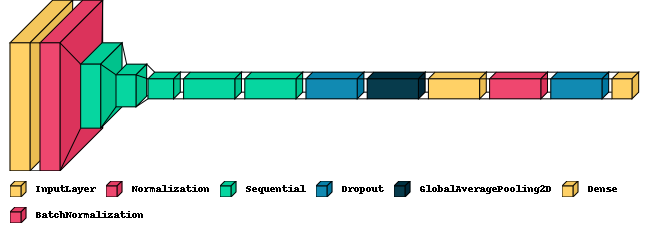

In [44]:
visualkeras.layered_view(final_model,legend=True, to_file="vgg.png")

# Summary

In summary, I experimented with various models using transfer learning and tried different image augmentation approach. More room for improvement can be made like tuning the efficientNetModel and using techniques like ensemble.
